In [2]:
from sympy import *
from dtumathtools import *
from IPython.display import Markdown
from extras import print_delayer
import networkx as nx
init_printing(use_latex="mathjax" )
mdisplay = lambda x: display(Markdown(str(x)))
nx_args={'with_labels':True, 'node_color':"white", 'edgecolors':"black", 'node_size':400}

# class print_delayer:
#     def __init__(self):
#         self.delayed_print = ""

#     def add(self, input):
#         self.extend("\n")
#         self.extend(input)

#     def extend(self, input):
#         if isinstance(input, Markdown):
#             input = input.data
#         if not isinstance(input, str):
#             input = f"${latex(input)}$"
#         input = input.replace("\n", "\n\n")
#         self.delayed_print += input

#     def adisplay(self, input):
#         self.add(input)
#         mdisplay(self)
    
#     def edisplay(self, input):
#         self.extend(input)
#         mdisplay(self)


#     def __str__(self):
#         temp = self.delayed_print
#         self.delayed_print = ""
#         return temp

p = print_delayer()

# Grafteoretisk Modellering af Netværk

## Opgave 1

In [3]:
p1,p2,p3,p4,p5 = symbols('$p_1:6$')
V1 = {p1, p2, p3, p4, p5}
E1 = {(p1,p3), (p1,p5),(p2,p4),(p2,p5),(p3,p1),(p4,p1),(p4,p2),(p4,p5)}
W = nx.DiGraph()
W.add_nodes_from(V1, color="white")

W.add_edges_from(E1)
nx.draw(W,**nx_args)

## Opgave 2

In [4]:
p1,p2,p3,p4,p5,p6 = symbols('$P_1:7$')
V2 = {p1, p2, p3, p4, p5, p6}
E2 = {(p1,p2), (p2,p3),(p3,p1),(p4,p5),(p5,p6),(p6,p4)}
W2 = nx.DiGraph()
W2.add_nodes_from(V2, color="white")

W2.add_edges_from(E2)
nx.draw(W2,**nx_args)

# Opgave 3
#

Jo flere komponenter der er i et netværk, jo svære bliver det at finde en specifik node. Faktisk er det helt umuligt at finde frem til en node i et komponent, hvis man er i et andet komponent til at begynde med. Der er altså ingen links fra den ene hjemmeside til den anden. 

##

In [5]:
W1 = {p1: {p3, p5}, p2: {p5, p4}, p3: {p1}, p4: {p1, p5, p2}, p5: {}}
W2 = {p1: {p2}, p2: {p3}, p3: {p1}, p4: {p5}, p5: {p6}, p6: {p4}}

Det kan tjekkes om en node i graphen ikke linker til andrer noder, ved at tjekke om nodens value i adjacency listen er den tomme mængde $\emptyset$

## Opgave 5

In [6]:
import numpy as np
import random

# Input: n og k er ikke-negative heltal
# Output: web er en dictionary med n nøgler.
# Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
def make_web(n,k,kmin=0):
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(symbols(f"$p_{{0:{n}}}$")) 
    web = dict()
    
    for i, j in enumerate(keys):
        numlinks = np.random.randint(kmin, k)
        
        
        # key_choices = keys.copy()
        # key_choices.remove(j)
        
        potential_pages = [ j ]
        
        while j in potential_pages:
            potential_pages = random.sample(keys, numlinks)
        
        web[j] = potential_pages
    
    return web

print(make_web(4,3, 1))

{$p_{0}$: [$p_{2}$, $p_{1}$], $p_{1}$: [$p_{2}$], $p_{2}$: [$p_{1}$, $p_{0}$], $p_{3}$: [$p_{1}$, $p_{2}$]}



## Opgave 6


In [7]:
import matplotlib.pyplot as plt

def convert_to_nxgraph(web : dict):
    digraph = nx.DiGraph()
    digraph.add_nodes_from(web.keys())

    for page in web.keys():
        for link_to in web[page]:
            digraph.add_edge(page, link_to)

    return digraph

    # Input: netværk som dictionary
    # Output: Netværk visualiseret som graf
def visualize_graph(web : dict):
    digraph = convert_to_nxgraph(web)
    
    plt.figure()
    nx.draw(digraph, **nx_args)
    plt.plot()

visualize_graph(make_web(10, 5, 0))

# Link matricen og Random Surfer Modellen

## Opgave 7

In [8]:
def make_adjacency_matrix(graph):
    A = nx.adjacency_matrix(convert_to_nxgraph(graph))
    b = A.toarray().transpose()
    return b

In [9]:
W1 = {p1: {p3, p5}, p2: {p5, p4}, p3: {p1}, p4: {p1, p5, p2}, p5: {}}
display(Matrix(make_adjacency_matrix(W1)))




⎡0  0  1  1  0⎤
⎢             ⎥
⎢0  0  0  1  0⎥
⎢             ⎥
⎢1  0  0  0  0⎥
⎢             ⎥
⎢0  1  0  0  0⎥
⎢             ⎥
⎣1  1  0  1  0⎦

# Opgave 8

In [ ]:
def make_link_matrix(graph: dict):

    adjacency_matrix : np.ndarray = make_adjacency_matrix(graph)

    n = adjacency_matrix.shape[0]
    link_matrix = np.zeros((n,n))
    display(link_matrix)
    for j in range(n):
        N = adjacency_matrix[:,j].sum()
        
        if N == 0:
            link_matrix[:,j] = 1 / n
            continue
            
        for i in range(n):
            if adjacency_matrix[i][j] == 1:
                link_matrix[i][j] = 1 / N
    
    return link_matrix
                

display(Matrix(make_link_matrix(W1)))


⎡0.0  0.0  1.0  0.333333333333333  0.2⎤
⎢                                     ⎥
⎢0.0  0.0  0.0  0.333333333333333  0.2⎥
⎢                                     ⎥
⎢0.5  0.0  0.0         0.0         0.2⎥
⎢                                     ⎥
⎢0.0  0.5  0.0         0.0         0.2⎥
⎢                                     ⎥
⎣0.5  0.5  0.0  0.333333333333333  0.2⎦

Matricerne har elementer samme sted, man tager antal 1-taller i hver søjle og sætter de tilsvarende elementer lig 1 / dette antal.
Hvis en søjle er en 0 vektor, sætter man alle elementer lig $\frac1N$

## Opgave 9

In [11]:
# Input: Et netværk som dictionary og en start side
# Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
def surf_step(web, page):
    
    distribution=dict()

    for link in web[page]:
        distribution[link] = 1 / len(web[page])
        
    if len(distribution) == 0:
        num_pages = len(web.keys())
        
        for web_page in web.keys():
            distribution[web_page] = 1 / num_pages

    return distribution

print(surf_step(W1, p1))

{$P_5$: 0.5, $P_3$: 0.5}


## Opgave 10

In [12]:
# Input: Et netværk som dictionary og antallet af skridt i random surf simuleringen
# Output: PageRank-værdier for hver side som en dictionary
def random_surf(web, n):


    
    ranking=dict()
    for page in web.keys():
        ranking[page] = 0
    page = np.random.choice(list(web.keys()))
    ranking[page] = 1
    
    
    for i in range(n-1):
        potential_pages = surf_step(web, page)
        page = np.random.choice(list(potential_pages.keys()), p = list(potential_pages.values()))
        ranking[page] += 1 
    for page in web.keys():
        ranking[page] /= n 
    return ranking
print(random_surf(W1,1000))

{$P_1$: 0.299, $P_2$: 0.096, $P_3$: 0.201, $P_4$: 0.091, $P_5$: 0.313}


## Opgave 11

In [13]:
def test_surf_model(model: callable, web: dict):
    output = ""
    for interval in [100, 1000, 10000]:
        output += f"interval: {interval}\n"
        for n in range(interval, interval+10, 1):
            output += f"{model(web, n)}\n"
    return output

In [14]:
mdisplay(p)

Den varierer meget, selv små skridt i iterations størrelsen varierer ret meget.
Størrelsesordnerne er dog ca. det samme, og den bliver mere konsistent desto højere skridt iterations størrelsen er.

## Opgave 12


In [15]:
import random

# Input: Et netværk som dictionary og en start side
# Output: Sandsynlighedsfordeling som dictionary for næste hjemmeside
def surf_step_damp(web, page, d):
    
    distribution=dict()

    for link in web[page]:
        distribution[link] = 1 / len(web[page])
    
    if len(distribution) == 0 or random.random() >= d:
        num_pages = len(web.keys())
        
        for web_page in web.keys():
            distribution[web_page] = 1 / num_pages

    return distribution

print(surf_step_damp(W1, p1, 0.85))

{$P_5$: 0.5, $P_3$: 0.5}


In [16]:
def random_surf_damp(web, iterations, d):


    
    ranking=dict()
    for page in web.keys():
        ranking[page] = 0
    page = np.random.choice(list(web.keys()))
    ranking[page] = 1
    
    
    for i in range(iterations-1):
        potential_pages = surf_step_damp(web, page, d)
        page = np.random.choice(list(potential_pages.keys()), p = list(potential_pages.values()))
        ranking[page] += 1 
    for page in web.keys():
        ranking[page] /= iterations 
    return ranking
print(random_surf_damp(W1,1000, 0.85))

{$P_1$: 0.262, $P_2$: 0.13, $P_3$: 0.178, $P_4$: 0.138, $P_5$: 0.292}


# Opgave 13

In [17]:
dampening_factor = 0.85


p.adisplay(test_surf_model(lambda web, n: random_surf_damp(web, n, dampening_factor), W1))




interval: 100

{$P_1$: 0.22, $P_2$: 0.16, $P_3$: 0.15, $P_4$: 0.19, $P_5$: 0.28}

{$P_1$: 0.2079207920792079, $P_2$: 0.15841584158415842, $P_3$: 0.13861386138613863, $P_4$: 0.19801980198019803, $P_5$: 0.297029702970297}

{$P_1$: 0.21568627450980393, $P_2$: 0.1568627450980392, $P_3$: 0.1568627450980392, $P_4$: 0.16666666666666666, $P_5$: 0.30392156862745096}

{$P_1$: 0.24271844660194175, $P_2$: 0.14563106796116504, $P_3$: 0.20388349514563106, $P_4$: 0.08737864077669903, $P_5$: 0.32038834951456313}

{$P_1$: 0.2692307692307692, $P_2$: 0.11538461538461539, $P_3$: 0.19230769230769232, $P_4$: 0.15384615384615385, $P_5$: 0.2692307692307692}

{$P_1$: 0.2571428571428571, $P_2$: 0.12380952380952381, $P_3$: 0.2, $P_4$: 0.1523809523809524, $P_5$: 0.26666666666666666}

{$P_1$: 0.25471698113207547, $P_2$: 0.1320754716981132, $P_3$: 0.19811320754716982, $P_4$: 0.14150943396226415, $P_5$: 0.27358490566037735}

{$P_1$: 0.2616822429906542, $P_2$: 0.14953271028037382, $P_3$: 0.12149532710280374, $P_4$: 0.14018691588785046, $P_5$: 0.32710280373831774}

{$P_1$: 0.2037037037037037, $P_2$: 0.14814814814814814, $P_3$: 0.16666666666666666, $P_4$: 0.1574074074074074, $P_5$: 0.32407407407407407}

{$P_1$: 0.25688073394495414, $P_2$: 0.11009174311926606, $P_3$: 0.1926605504587156, $P_4$: 0.1559633027522936, $P_5$: 0.28440366972477066}

interval: 1000

{$P_1$: 0.282, $P_2$: 0.125, $P_3$: 0.212, $P_4$: 0.12, $P_5$: 0.261}

{$P_1$: 0.2887112887112887, $P_2$: 0.11688311688311688, $P_3$: 0.18581418581418582, $P_4$: 0.13086913086913088, $P_5$: 0.2777222777222777}

{$P_1$: 0.2654690618762475, $P_2$: 0.12874251497005987, $P_3$: 0.19760479041916168, $P_4$: 0.13672654690618763, $P_5$: 0.2714570858283433}

{$P_1$: 0.27018943170488535, $P_2$: 0.11365902293120637, $P_3$: 0.18943170488534397, $P_4$: 0.12462612163509472, $P_5$: 0.3020937188434696}

{$P_1$: 0.27689243027888444, $P_2$: 0.11354581673306773, $P_3$: 0.20418326693227093, $P_4$: 0.12151394422310757, $P_5$: 0.28386454183266935}

{$P_1$: 0.2915422885572139, $P_2$: 0.09950248756218906, $P_3$: 0.19303482587064677, $P_4$: 0.13034825870646766, $P_5$: 0.2855721393034826}

{$P_1$: 0.279324055666004, $P_2$: 0.11928429423459244, $P_3$: 0.20278330019880716, $P_4$: 0.13220675944333996, $P_5$: 0.2664015904572565}

{$P_1$: 0.27904667328699106, $P_2$: 0.1112214498510427, $P_3$: 0.21549155908639522, $P_4$: 0.10327706057596822, $P_5$: 0.29096325719960275}

{$P_1$: 0.2857142857142857, $P_2$: 0.11011904761904762, $P_3$: 0.22420634920634921, $P_4$: 0.11507936507936507, $P_5$: 0.2648809523809524}

{$P_1$: 0.3012884043607532, $P_2$: 0.0981169474727453, $P_3$: 0.2180376610505451, $P_4$: 0.12091179385530228, $P_5$: 0.2616451932606541}

interval: 10000

{$P_1$: 0.2788, $P_2$: 0.1151, $P_3$: 0.1967, $P_4$: 0.1258, $P_5$: 0.2836}

{$P_1$: 0.28117188281171884, $P_2$: 0.11608839116088392, $P_3$: 0.196980301969803, $P_4$: 0.1267873212678732, $P_5$: 0.278972102789721}

{$P_1$: 0.27804439112177565, $P_2$: 0.11487702459508098, $P_3$: 0.1887622475504899, $P_4$: 0.1272745450909818, $P_5$: 0.29104179164167165}

{$P_1$: 0.2768169549135259, $P_2$: 0.11496551034689594, $P_3$: 0.19844046785964212, $P_4$: 0.1227631710486854, $P_5$: 0.28701389583125064}

{$P_1$: 0.2761895241903239, $P_2$: 0.11815273890443823, $P_3$: 0.19822071171531389, $P_4$: 0.12844862055177927, $P_5$: 0.2789884046381447}

{$P_1$: 0.27596201899050476, $P_2$: 0.11604197901049475, $P_3$: 0.1934032983508246, $P_4$: 0.1262368815592204, $P_5$: 0.28835582208895555}

{$P_1$: 0.284129522286628, $P_2$: 0.10943433939636218, $P_3$: 0.20477713371976813, $P_4$: 0.12322606436138317, $P_5$: 0.27843294023585846}

{$P_1$: 0.27470770460677524, $P_2$: 0.11451983611471969, $P_3$: 0.19626261616868193, $P_4$: 0.12771060257819528, $P_5$: 0.28679924053162786}

{$P_1$: 0.28457234212629895, $P_2$: 0.11061151079136691, $P_3$: 0.20243804956035172, $P_4$: 0.11980415667466027, $P_5$: 0.2825739408473221}

{$P_1$: 0.27515236287341394, $P_2$: 0.12089119792187032, $P_3$: 0.1879308622239984, $P_4$: 0.13218103706664003, $P_5$: 0.2838445399140773}



Nu kan man se at man får et bedere estimat på pageranken for grafer med flere komponenter.

# Rekursiv Model og Matrix Formulering

## Opgave 14

\begin{equation*}
PR_{n+1}(p) = (1-d)\frac{1}{N} + d\sum_{q \in Inbound(p)}\frac{PR_n(q)}{\deg^+(q)} + \left[ d\sum_{s \in Sinks(W)}\frac{PR_{n}(s)}{N} \right]
\end{equation*}

Første led er sandsynligheden af at man kommer fra en tilfældig hjemmeside, hvor (1-d) er sandsynlighed for at dæmpningen sker. 1/N er sandsynlighen for at P sker. 
Andet led er sandsynlighedn for at man kommer (direkte) fra en anden hjemmeside (d). Ganget med for ethvert hjemmeside der peger på P (q), ganget med sandsynligheden for at man er på q, ganget med chancen for at man trykker på p. 

## Opgave 15

In [67]:
def rank_update(web: dict, page_ranks: dict, page, d):

        """
        Opdaterer værdien af PageRank for en side baseret på den rekursive formel
        Sider uden udgående links --->(sinks)<--- behandles som om de linker til alle sider på nettet.

        Input: 
            web og PageRanks er dictionaries som i outputtet fra "make_web" og "random_surf",
            page er nøglen til den side, hvis rank vi ønsker at opdatere, og
            d er dampingfaktoren.
        Output: 
            PageRank opdateres i henhold til ovenstående formel,
            og denne funktion returnerer et float "increment", den (absolutte) forskel
            mellem den tidligere værdi og den opdaterede værdi af PR(p).
        """
        # inbound_page is the same as q, in the original equation
        # lenth of web.keys is the same as N
        
        # for random pages
        new_page_rank = (1-d)* 1 / len(web)
        
        # for inbound web pages
        new_page_rank += d * sum([
              page_ranks[inbound_page]/len(web[inbound_page]) 
              for inbound_page in web 
              if page in web[inbound_page]
              ])
        
        # for sinks
        new_page_rank += d * sum([
              page_ranks[sink]/len(web) 
              for sink in web 
              if len(web[sink]) == 0
              ])

        return new_page_rank - page_ranks[page]

def recursive_page_rank(web : dict, iterations=200, stopvalue=0, d=0.85):
    """
    Implementerer den rekursive version af PageRank-algoritmen ved først at oprette
    en PageRank på 1/N til alle sider (hvor N er det samlede antal sider)
    og derefter anvende "rank_update" gentagne gange, indtil en af de to stopbetingelser
    er opnået:
    stopbetingelse 1: den maksimale ændring fra trin n til trin (n+1) over alle PageRank
    er mindre end stopværdien,
    Stopbetingelse 2: antallet af iterationer har nået "max_iterations".

    Input: web er et dictionary som i outputtet af "make_web", d er dæmpningen,
    stopvalue er et positivt float, max_iterations er et positivt heltal.
    """

    page_ranks = dict()
    
    for page in web:
        page_ranks[page] = 1/len(web)
    
    display(page_ranks)

    for iteration in range(iterations):
        increments = dict()
        
        for page in web:
            increments[page]=rank_update(web,page_ranks,page,d)
        
        if max([ abs(v) for v in increments.values()]) <= stopvalue:
            break
        
        for page in increments:
            page_ranks[page] += increments[page]
        display(page_ranks)

    return page_ranks


display(recursive_page_rank(W1, iterations=100, stopvalue=1e-6, d=1))


{$P_1$: 0.2, $P_2$: 0.2, $P_3$: 0.2, $P_4$: 0.2, $P_5$: 0.2}

{$P_1$: 0.30666666666666664, $P_2$: 0.10666666666666666, $P_3$: 0.14, $P_4$: 0 ↪

↪ .14, $P_5$: 0.30666666666666664}

{$P_1$: 0.248, $P_2$: 0.108, $P_3$: 0.21466666666666664, $P_4$: 0.114666666666 ↪

↪ 66667, $P_5$: 0.31466666666666665}

{$P_1$: 0.3158222222222222, $P_2$: 0.10115555555555555, $P_3$: 0.1869333333333 ↪

↪ 3334, $P_4$: 0.11693333333333333, $P_5$: 0.27915555555555555}

{$P_1$: 0.2817422222222222, $P_2$: 0.09480888888888889, $P_3$: 0.2137422222222 ↪

↪ 2222, $P_4$: 0.10640888888888889, $P_5$: 0.3032977777777778}

{$P_1$: 0.30987140740740743, $P_2$: 0.09612918518518518, $P_3$: 0.201530666666 ↪

↪ 66666, $P_4$: 0.108064, $P_5$: 0.28440474074074074}

{$P_1$: 0.29443294814814813, $P_2$: 0.09290228148148147, $P_3$: 0.211816651851 ↪

↪ 85186, $P_4$: 0.10494554074074074, $P_5$: 0.2959025777777778}

{$P_1$: 0.3059790143209877, $P_2$: 0.0941623624691358, $P_3$: 0.20639698962962 ↪

↪ 963, $P_4$: 0.10563165629629628, $P_5$: 0.2878299772839506}

{$P_1$: 0.2991735371851852, $P_2$: 0.09277654755555555, $P_3$: 0.2105555026172 ↪

↪ 8395, $P_4$: 0.10464717669135802, $P_5$: 0.2928472359506173}

{$P_1$: 0.30400734203786006, $P_2$: 0.09345183942057614, $P_3$: 0.208156215782 ↪

↪ 71604, $P_4$: 0.10495772096790124, $P_5$: 0.2894268817909465}

{$P_1$: 0.30102749913020577, $P_2$: 0.0928712833474897, $P_3$: 0.2098890473771 ↪

↪ 1933, $P_4$: 0.10461129606847737, $P_5$: 0.2916008740767078}

{$P_1$: 0.3030796542152867, $P_2$: 0.09319060683816735, $P_3$: 0.2088339243804 ↪

↪ 4446, $P_4$: 0.10475581648908641, $P_5$: 0.29013999807701507}

{$P_1$: 0.3017805294922096, $P_2$: 0.09294660511176515, $P_3$: 0.2095678267230 ↪

↪ 4636, $P_4$: 0.10462330303448669, $P_5$: 0.29108173563849216}

{$P_1$: 0.30265860819557366, $P_2$: 0.09309078147252733, $P_3$: 0.209106611873 ↪

↪ 80325, $P_4$: 0.10468964968358101, $P_5$: 0.2904543487745147}

{$P_1$: 0.3020940315232332, $P_2$: 0.09298741964942994, $P_3$: 0.2094201738526 ↪

↪ 8977, $P_4$: 0.10463626049116662, $P_5$: 0.2908621144834804}

{$P_1$: 0.3024713502464414, $P_2$: 0.09305117639375163, $P_3$: 0.2092194386583 ↪

↪ 127, $P_4$: 0.10466613272141106, $P_5$: 0.2905919019800832}

{$P_1$: 0.3022265299614664, $P_2$: 0.09300709130315367, $P_3$: 0.2093540555192 ↪

↪ 3736, $P_4$: 0.10464396859289246, $P_5$: 0.2907683546232502}

{$P_1$: 0.3023890493081849, $P_2$: 0.09303499378894753, $P_3$: 0.2092669359053 ↪

↪ 8323, $P_4$: 0.10465721657622687, $P_5$: 0.29065180442125754}

{$P_1$: 0.30228303564837705, $P_2$: 0.0930160997429938, $P_3$: 0.2093248855383 ↪

↪ 4394, $P_4$: 0.10464785777872528, $P_5$: 0.29072812129156}

{$P_1$: 0.302353129056231, $P_2$: 0.0930282435178871, $P_3$: 0.209287142082500 ↪

↪ 54, $P_4$: 0.1046536741298089, $P_5$: 0.2906778112135725}

{$P_1$: 0.30230726236848465, $P_2$: 0.09302012028598414, $P_3$: 0.209312126770 ↪

↪ 83, $P_4$: 0.10464968400165806, $P_5$: 0.2907108065730432}

{$P_1$: 0.30233751608599135, $P_2$: 0.09302538931516133, $P_3$: 0.209295792498 ↪

↪ 85097, $P_4$: 0.10465222145760071, $P_5$: 0.29068908064239574}

{$P_1$: 0.30231768244653034, $P_2$: 0.09302188994767938, $P_3$: 0.209306574171 ↪

↪ 47483, $P_4$: 0.1046505107860598, $P_5$: 0.2907033426482557}

{$P_1$: 0.30233074629647927, $P_2$: 0.09302417212500441, $P_3$: 0.209299509752 ↪

↪ 9163, $P_4$: 0.10465161350349084, $P_5$: 0.29069395832210926}

{$P_1$: 0.30232217258516847, $P_2$: 0.09302266283225213, $P_3$: 0.209304164812 ↪

↪ 66148, $P_4$: 0.10465087772692405, $P_5$: 0.290700122042994}

{$P_1$: 0.30232781513023493, $P_2$: 0.09302365031757348, $P_3$: 0.209301110701 ↪

↪ 18304, $P_4$: 0.10465135582472487, $P_5$: 0.2906960680262838}

{$P_1$: 0.3023241095813481, $P_2$: 0.09302299888016505, $P_3$: 0.2093031211703 ↪

↪ 7422, $P_4$: 0.1046510387640435, $P_5$: 0.2906987316040692}

{$P_1$: 0.3023265470792026, $P_2$: 0.09302342590882834, $P_3$: 0.2093018011114 ↪

↪ 8788, $P_4$: 0.10465124576089638, $P_5$: 0.29069698013958495}

{$P_1$: 0.30232494572637036, $P_2$: 0.09302314461488245, $P_3$: 0.209302669567 ↪

↪ 51828, $P_4$: 0.10465110898233115, $P_5$: 0.2906981311088979}

{$P_1$: 0.30232599878340827, $P_2$: 0.09302332921588996, $P_3$: 0.209302099084 ↪

↪ 96478, $P_4$: 0.1046511985292208, $P_5$: 0.2906973743865164}

{$P_1$: 0.30232599878340827, $P_2$: 0.09302332921588996, $P_3$: 0.209302099084 ↪

↪ 96478, $P_4$: 0.1046511985292208, $P_5$: 0.2906973743865164}

# Opgave 16

Argumentér for at (▲) kan omskrives til (■).

\begin{equation*}
PR_{n+1}(p) = (1-d)\frac{1}{N} + d\sum_{q \in Inbound(p)}\frac{PR_n(q)}{\deg^+(q)}
\end{equation*}

Vi kigger på række $i$ i matrix formlen

$$
x_{n+1} = (1-d) \frac{1}{N} \pmb{e} + d \pmb{L} {x_n}
\\
= (1-d) \frac{1}{N} \pmb{e} + d 
\begin{bmatrix}
\pmb{L}_{1,1} \cdot PR_{n}(p_0) + \pmb{L}_{1,2} \cdot PR_{n}(p_1) + \cdots + \pmb{L}_{1,N} \cdot PR_{n}(p_N) 
\\
\pmb{L}_{2,1} \cdot PR_{n}(p_0) + \pmb{L}_{2,2} \cdot PR_{n}(p_1) + \cdots + \pmb{L}_{2,N} \cdot PR_{n}(p_N)
\\
\vdots
\\
\pmb{L}_{N,1} \cdot PR_{n}(p_0) + \pmb{L}_{N,2} \cdot PR_{n}(p_1) + \cdots + \pmb{L}_{N,N} \cdot PR_{n}(p_N)
\end{bmatrix}
$$

I følge definitionen af link matricen vil alle elementer på række $i$ have værdi $\frac{1}{deg^+(p_j)}$ hvis den er inbound på $p_i$ og ellers $0$, altså passer det med summen i (▲)

$$
\pmb{x}_{n+1} =
\begin{bmatrix}
(1-d)\frac{1}{N}+d \sum_{j\in Inbound(p_{1})}\frac{PR_{n}(j)}{\deg^{+}(j)}
\\
(1-d)\frac{1}{N}+d \sum_{j\in Inbound(p_{2})}\frac{PR_{n}(j)}{\deg^{+}(j)}
\\
\vdots 
\\
(1-d)\frac{1}{N}+d \sum_{j\in Inbound(p_{n})}\frac{PR_{n}(j)}{\deg^{+}(j)}
\end{bmatrix}
$$

Her ses det hver række i $\pmb{x}_{n+1}$ stemmer overens med den rekursive formel (▲)

## Opgave 17

In [68]:
def modified_link_matrix(web: dict, d=0.85):

    # Input: web (dictionary), pagelist (liste over nøgler), d (dæmpningsfaktor)
    # Output: d*A^T + (1-d)*E/N
    
    # A: NxN numpy array, hvor række j har ikke-nul elementer i søjler, som side j linker til.
    # Hvis side j ikke linker til nogen, får alle elementer i række j værdien 1/N.
    # E: np.ones([N,N])
    
    # A er en Transponeret link-matrice ifølge formlen (BØR MÅSKE ÆNDRES)
    A = make_link_matrix(web).T
    N = len(web)
    
    E = np.ones([N,N])
    
    return d*A.T + (1-d)*E/N


In [69]:
Matrix(modified_link_matrix(W1)),Matrix(modified_link_matrix(W2))


⎛                                              ⎡0.025  0.025  0.875  0.025  0. ↪
⎜⎡0.03   0.03   0.88  0.313333333333333  0.2⎤  ⎢                               ↪
⎜⎢                                          ⎥  ⎢0.875  0.025  0.025  0.025  0. ↪
⎜⎢0.03   0.03   0.03  0.313333333333333  0.2⎥  ⎢                               ↪
⎜⎢                                          ⎥  ⎢0.025  0.875  0.025  0.025  0. ↪
⎜⎢0.455  0.03   0.03        0.03         0.2⎥, ⎢                               ↪
⎜⎢                                          ⎥  ⎢0.025  0.025  0.025  0.025  0. ↪
⎜⎢0.03   0.455  0.03        0.03         0.2⎥  ⎢                               ↪
⎜⎢                                          ⎥  ⎢0.025  0.025  0.025  0.875  0. ↪
⎜⎣0.455  0.455  0.03  0.313333333333333  0.2⎦  ⎢                               ↪
⎝                                              ⎣0.025  0.025  0.025  0.025  0. ↪

↪ 025  0.025⎤⎞
↪           ⎥⎟
↪ 025  0.025⎥⎟
↪           ⎥⎟
↪ 025  0.025⎥⎟
↪           ⎥⎟
↪ 025  0.875⎥⎟
↪  

## Opgave 18

Hver søjle i L summer til 1, det vil sige at hver søjle summer til d, efter som vi ganger den med d.

Hvis vi summer for $\frac{1-d}{N}\pmb{E}_N$, og da E er en N gange N matrice med 1, taller. Vil vi så få summen af en søjle til at være $(\frac{1-d}{N})N=1-d$

Da $d+(1-d)=1$ summer alle søjler altså til 1.


# Markov matricen: Egenskaber og Dæmpning i PageRank

## Opgave 19 [X]

Da link matricen ikke indeholder negative værdier og dens søjler summere til $1$, er dens transponerede matrix en markov matrix, da dens rækker nu summere til $1$.

## Opgave 20 [X]

Når vi ganger en markov matrix med en søjlevektor, bestående kun af 1 taller, vil det resultere i en søjlevektor hvor hvert element er summen af hver række i matricen. Da matricen er en markov matrix er summen af dens rækker alle $1$ altså det samme som vektoren der blev ganget på.

## Opgave 21 [X]

Diagonalen i $\pmb{A}$ og $\pmb{A}^T$ vil bestå af de samme værdier.
Dette må betyde deres karakteristiske polynomier er ens.
Dermed må deres egenværdier også være ens.

In [106]:
A = Matrix([
    [1, 2],
    [1, 2]
])

At = A.T

p.add(f"Eigenvects of $\\pmb{{A}}$: $${latex(A.eigenvects())}$$")
p.add(f"Eigenvects of $\\pmb{{A}}^T$: $${latex(At.eigenvects())}$$")
mdisplay(p)



Eigenvects of $\pmb{A}$: $$\left[ \left( 0, \  1, \  \left[ \left[\begin{matrix}-2\\1\end{matrix}\right]\right]\right), \  \left( 3, \  1, \  \left[ \left[\begin{matrix}1\\1\end{matrix}\right]\right]\right)\right]$$

Eigenvects of $\pmb{A}^T$: $$\left[ \left( 0, \  1, \  \left[ \left[\begin{matrix}-1\\1\end{matrix}\right]\right]\right), \  \left( 3, \  1, \  \left[ \left[\begin{matrix}\frac{1}{2}\\1\end{matrix}\right]\right]\right)\right]$$

## Opgave 22 

Hver række i $A$ summer til $1$, det vil sige at hver række summer til $d$, efter som vi ganger den med $d$.

Hvis vi summer for $\frac{1-d}{n}\pmb{E}_n$, og da $E$ er en $n$ gange $n$ matrice med $1$, taller. Vil vi så få summen af en række til at være $(\frac{1-d}{n})n=1-d$

Da $d+(1-d)=1$ summer alle rækker altså til 1.

Der er ingen negative elementer i hverken højre eller venstre led. Ledet til venstre KAN ikke være 0, og da d ikke kan være 1 ender venstre udtryk altså med at være strengt positivt. A, kan godt have elementer som er 0, men da venstre udtryk altid er positivt, vil vores $\pmb{A}_d$ matrix stadig være strengt positiv.


## Opgave 23

Grundet opgave 18, ved vi at $\pmb{M}_d$'s søjler summer til 1, ud fra opgave 19 ved vi så at $\pmb{M}_d$ transporneret er en markov matrix.
Vi ved så ud fra opgave 20 at en markov matrix altid har egenværdi 1, og ud fra opgave 21 ved vi at den transpornerede version af en matrix har samme egenværdier som den ikke transpornerede. Derfor må $\pmb{M}_d$ altså have egenværdien 1. 

## Opgave 24

In [71]:
from scipy.linalg import null_space

def eigenvector_PageRank(web :dict,d=0.85):
        # Input: web er en ordbog over websider og links.
        # d er dæmpningen
        # Output: En ordbog med de samme nøgler som web og værdierne er PageRank for nøglerne

        ranking = dict()

        # INDSÆT KODE HER
        
        Md = modified_link_matrix(web, d)
        
        eig_mat = (Md - np.eye(len(web)))

        # første egenvektor har egenværdi 1

        probability_vector = null_space(eig_mat, rcond=0.0000001)
        probability_vector /= sum(probability_vector)
        for page, pagerank in zip(web, probability_vector):
            ranking[page] = pagerank[0]

        return ranking

print(eigenvector_PageRank(W1))

{$P_1$: 0.2814079026123765, $P_2$: 0.11357982853189831, $P_3$: 0.19744479303585655, $P_4$: 0.12611786155165336, $P_5$: 0.28144961426821513}


## Opgave 25

In [72]:
from time import time
start_time = time()
print("BEFORE WEB")
web = make_web(500, 10, 0)
print("AFTER WEB")
print(eigenvector_PageRank(web))
print("AFTER PAGE RANK")
print(time() - start_time)

BEFORE WEB
AFTER WEB
{$p_{0}$: 0.0019907286312805875, $p_{1}$: 0.0010653056337385756, $p_{2}$: 0.0014100380180374391, $p_{3}$: 0.0028416170207327053, $p_{4}$: 0.003033772898207026, $p_{5}$: 0.001594272779376819, $p_{6}$: 0.0020564616096334495, $p_{7}$: 0.0007506300355233587, $p_{8}$: 0.003247658939680298, $p_{9}$: 0.001732333023735785, $p_{10}$: 0.0009495939703586423, $p_{11}$: 0.0008853011579364402, $p_{12}$: 0.0015804996859519111, $p_{13}$: 0.0006197789871506458, $p_{14}$: 0.002552547552302231, $p_{15}$: 0.002384178605964562, $p_{16}$: 0.0013735754343648337, $p_{17}$: 0.0020848796750222577, $p_{18}$: 0.0013740583607313515, $p_{19}$: 0.00205911397784868, $p_{20}$: 0.002077099971788323, $p_{21}$: 0.0013653052372450429, $p_{22}$: 0.0017535130205518596, $p_{23}$: 0.0008189418461989186, $p_{24}$: 0.001686359354427742, $p_{25}$: 0.0010027027764344682, $p_{26}$: 0.0016653403050709526, $p_{27}$: 0.0020728677121544014, $p_{28}$: 0.0008746327447319412, $p_{29}$: 0.0007462935606710845, $p_{30}$

# PageRank algoritmen: Iterativ Konvergens og Dæmpning i Markov Matricer

# Opgave 26


In [73]:
A = Matrix([
    [0.2, 0.5, 0.3],
    [0.4, 0.4, 0.2],
    [0.1, 0.7, 0.2],
])

B = Matrix([
    [0.5, 0.3, 0.2],
    [0.2, 0.5, 0.3],
    [0.3, 0.2, 0.5],
])

C : Matrix = A*B
def is_markov(matrix : Matrix):
    for row in range(matrix.rows):
        if (sum(matrix.row(row)) not in [1, 1.0]):
            return False

    return True
p.add(C)
p.adisplay(f"${latex(is_markov(C))}$")



$\left[\begin{matrix}0.29 & 0.37 & 0.34\\0.34 & 0.36 & 0.3\\0.25 & 0.42 & 0.33\end{matrix}\right]$

$\text{True}$

# Opgave 27

Summen af en række $i$ af en matrix som er produktet af 2 matricer er kan beskrives som:
$$
a_{i1}(b_{11}+\dots+b_{1n})+a_{i2}(b_{21}+\dots +b_{2n})+\dots +a_{in}(b_{n1}+\dots+b_{nn})
$$

altså det første element i den givne række i den første matrice skal ganges med alle elementer i den anden matrices første række, det skal plusses med andet element i den givne række til den første matrice ganget med alle elementer i den anden matrices anden række osv.

Hvis man summere alle rækkerne så får man altså denne søjlevektor, hvor hvert element er summen til den korrosponderene række.
$$
\begin{bmatrix}
a_{11}(b_{11}+\dots+b_{1n})+a_{12}(b_{21}+\dots +b_{2n})+\dots +a_{1n}(b_{n1}+\dots+b_{nn}) \\
a_{21}(b_{11}+\dots+b_{1n})+a_{22}(b_{21}+\dots +b_{2n})+\dots +a_{2n}(b_{n1}+\dots+b_{nn}) \\
\vdots \\
a_{n1}(b_{11}+\dots+b_{1n})+a_{n2}(b_{21}+\dots +b_{2n})+\dots +a_{nn}(b_{n1}+\dots+b_{nn}) \\
\end{bmatrix}
$$

Det kan vi skrive om eftersom vi ved at summen af rækkerne i de originalle matricer er 1, da de er markov matricer.

$$
\begin{bmatrix}
a_{11}(1)+a_{12}(1)+\dots +a_{1n}(1) \\
a_{21}(1)+a_{22}(1)+\dots +a_{2n}(1) \\
\vdots \\
a_{n1}(1)+a_{n2}(1)+\dots +a_{nn}(1) \\
\end{bmatrix}=
\begin{bmatrix}
a_{11}+a_{12}+\dots +a_{1n} \\
a_{21}+a_{22}+\dots +a_{2n} \\
\vdots \\
a_{n1}+a_{n2}+\dots +a_{nn} \\
\end{bmatrix}
=\begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix}
$$

# Opgave 28


Hvis produktet af 2 markov matricer er en markov matrix, så må $A^K$ også være en markov matrix.

# Opgave 29

$$
\pmb{A} \cdot \pmb{v} = 
\begin{bmatrix}
a_{11} & \cdots & a_{1n} \\
 & \vdots &  \\
a_{n1} & \cdots & a_{nn} \\
\end{bmatrix}
\cdot
\begin{bmatrix}
v_1 \\
\vdots \\
v_n \\
\end{bmatrix}
=
\begin{bmatrix}
v_1 \cdot a_{11} + \cdots + v_n \cdot a_{1n} \\
\vdots \\
v_1 \cdot a_{n1} + \cdots + v_1 \cdot a_{nn} \\
\end{bmatrix}
$$
Da $\pmb{A}$ er en markov matrix, må dens rækker summe til $1$. Dette medfører at hvert koordinat i $\pmb{A} \cdot \pmb{v}$ vil være et vægtet gennemsnit af alle elementer i $v$.
Da normen af et vægtet gennemsnit af komplekse tal aldrig kan antage en værdi større end den største norm i gennemsnittet, må det betyde der ikke kan eksisterer en værdi i $\pmb{A} \cdot \pmb{v}$, hvis norm er større end den største norm i $\pmb{v}$.


Antag nu at $|\lambda| > 1$.
Givet rækken $i$ indeholder den største norm i $v$, må rækken $i$ i $\pmb{A} \cdot \pmb{v}$ antage værdien $\lambda \cdot v_i$,.
Normen vil derfor være lig $|\lambda| \cdot |\pmb{v}_i|$ i $\pmb{A} \cdot \pmb{v}$, hvilket er en modstrid med det overstående.
Dermed må $|\lambda| \leq 1$.
Det er tidligere vist at en markov matrix altid har en egen værdi lig $1$.
Det må derfor være garanteret at $\mathrm{rad}_{\pmb{A}} = 1$

# Opgave 30 (*)

In [74]:
A = Matrix([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
])
p.add(is_markov(A))

p.add(A.eigenvals())

p.add(A**2)
p.add(A**1000)
p.add(A**1001)
mdisplay(p)




$\text{True}$

$\left\{ 1 : 1, \  - \frac{1}{2} - \frac{\sqrt{3} i}{2} : 1, \  - \frac{1}{2} + \frac{\sqrt{3} i}{2} : 1\right\}$

$\left[\begin{matrix}0 & 0 & 1\\1 & 0 & 0\\0 & 1 & 0\end{matrix}\right]$

$\left[\begin{matrix}0 & 1 & 0\\0 & 0 & 1\\1 & 0 & 0\end{matrix}\right]$

$\left[\begin{matrix}0 & 0 & 1\\1 & 0 & 0\\0 & 1 & 0\end{matrix}\right]$

# Opgave 31

Da $\lvert \lambda \rvert=1$ kan vi sige at

$$
\lVert \pmb{v} \rVert_{\infty}=\lvert v_{k} \rvert =\lvert \lambda \rvert \lvert v_{k} \rvert 
$$

Fra (Theorem 3.6.2) fra mat1a lærer bog ved vi at $\lvert z \rvert \lvert w \rvert = \lvert z\cdot w \rvert$ for vilkårlige $z,w\in\mathbb{C}\backslash\{ 0 \}$
Dermed ved vi at
$$
\begin{align}
\lvert \lambda \rvert \lvert v_{k} \rvert =\lvert \lambda v_{k} \rvert  \\

\end{align}
$$
noget noget
idk 
$$
\left\lvert  \sum_{j=1}^{n}a_{kj}v_{j}  \right\rvert 
$$

Trekantsuligheden siger at summen af normen af alle de individuelle led er større end eller ligmed normen af summen. Altså:

$$
\left\lvert  \sum_{j=1}^{n}a_{kj}v_{j}  \right\rvert \leq\sum_{j?1}^{n}\lvert a_{kj}v_{j} \rvert 
$$
Det kan vi videre omskrive vha.  tidligere teori og at vi ved at alle det gælder for alle elementer $0<a_{kj}<1$


$$
\sum_{j=1}^{n}\lvert a_{kj}v_{j} \rvert =\sum_{j=1}^{n}\lvert a_{kj}\rvert  \lvert v_{j} \rvert=\sum_{j=1}^{n} a_{kj}  \lvert v_{j} \rvert
$$

Da $\lvert v_{j} \rvert$ højest kan være $\lVert \pmb{v} \rVert_{\infty}$ kan vi sige:

$$
\sum_{j=1}^{n} a_{kj}  \lvert v_{j} \rvert\leq\sum_{j=1}^{n} a_{kj}  \lVert \pmb{v} \rVert_{\infty}
$$

Det kan vi til sidst omskrive således:

$$
\sum_{j=1}^{n} a_{kj}  \lVert \pmb{v} \rVert_{\infty}=\lVert \pmb{v} \rVert_{\infty}\sum_{j=1}^{n} a_{kj}  =\lVert \pmb{v} \rVert_{\infty}\cdot(1)=\lVert \pmb{v} \rVert_{\infty}
$$


Da alle $v_j$ er ens, må det betyde $v$ er udspændt af $\pmb{e}$.
Da $\pmb{e}$ har tilhørende egenværdi $1$, må ethvert $|\lambda| = 1$ medfører at $\lambda = 1$.

In [75]:
A = Matrix([
    [0.2, 0.5, 0.3],
    [0.4, 0.4, 0.2],
    [0.1, 0.7, 0.2],
])

B = Matrix([
    [0.5, 0.3, 0.2],
    [0.2, 0.5, 0.3],
    [0.3, 0.2, 0.5],
])

p.add(A.eigenvects())
p.adisplay(B.eigenvects())




$\left[ \left( 1.0 + 1.04082971799209 \cdot 10^{-33} i, \  1, \  \left[ \left[\begin{matrix}0.471433701802153 - 0.333292061319276 i\\0.471433701802153 - 0.333292061319276 i\\0.471433701802153 - 0.333292061319276 i\end{matrix}\right]\right]\right), \  \left( -0.1 - 0.141421356237309 i, \  1, \  \left[ \left[\begin{matrix}-0.24771821020657 - 0.336797322286762 i\\0.413847007681092 - 0.0871346248703274 i\\-0.600794582911543 + 0.598797181244281 i\end{matrix}\right]\right]\right), \  \left( -0.1 + 0.141421356237309 i, \  1, \  \left[ \left[\begin{matrix}0.161676632563345 + 0.485855728003897 i\\0.379737811419842 - 0.352266770367143 i\\-1.023607571563 + 0.177470651437973 i\end{matrix}\right]\right]\right)\right]$

$\left[ \left( 1.0 - 8.66498388741215 \cdot 10^{-66} i, \  1, \  \left[ \left[\begin{matrix}-0.543365203902173 + 0.195160417404974 i\\-0.543365203902173 + 0.195160417404974 i\\-0.543365203902173 + 0.195160417404974 i\end{matrix}\right]\right]\right), \  \left( 0.25 - 0.0866025403784439 i, \  1, \  \left[ \left[\begin{matrix}0.357960639322653 - 0.452987322150467 i\\-0.571278848235916 - 0.0835093461331033 i\\0.213318208913263 + 0.53649666828357 i\end{matrix}\right]\right]\right), \  \left( 0.25 + 0.0866025403784439 i, \  1, \  \left[ \left[\begin{matrix}0.547323372506061 - 0.183767405276141 i\\-0.114514444896342 + 0.565879647313292 i\\-0.432808927609719 - 0.382112242037151 i\end{matrix}\right]\right]\right)\right]$

## Opgave 32 (*)

In [76]:
A = Matrix([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
])
d = 0.85
iterations = A.shape[0]
En = Matrix(np.ones([iterations,iterations]))
Ad = (1-d)/iterations*En+d*A

p.add(Ad)
p.add(Ad.eigenvals())
p.add([abs(val) for val in Ad.eigenvals()])
p.add(Ad**2)
p.add(Ad**1000)
p.add(Ad**1001)
mdisplay(p)




$\left[\begin{matrix}0.05 & 0.9 & 0.05\\0.05 & 0.05 & 0.9\\0.9 & 0.05 & 0.05\end{matrix}\right]$

$\left\{ -0.425 - 0.736121593216773 i : 1, \  -0.425 + 0.736121593216773 i : 1, \  1.0 + 5.1434798388906 \cdot 10^{-66} i : 1\right\}$

$\left[ 1.0, \  0.85, \  0.85\right]$

$\left[\begin{matrix}0.0925 & 0.0925 & 0.815\\0.815 & 0.0925 & 0.0925\\0.0925 & 0.815 & 0.0925\end{matrix}\right]$

$\left[\begin{matrix}0.333333333333343 & 0.333333333333343 & 0.333333333333343\\0.333333333333343 & 0.333333333333343 & 0.333333333333343\\0.333333333333343 & 0.333333333333343 & 0.333333333333343\end{matrix}\right]$

$\left[\begin{matrix}0.333333333333343 & 0.333333333333343 & 0.333333333333343\\0.333333333333343 & 0.333333333333343 & 0.333333333333343\\0.333333333333343 & 0.333333333333343 & 0.333333333333343\end{matrix}\right]$

Wow, det passer med at den absolutte værdi af en af egenværdierne er præcist 1. Alle andre har modulus mindre end 1. Den konvergere også imod en specifik matrice, når k går mod uenedeligt.

## Opgave 33

Fordi at det betyder vores Markov matrice opløftet i k, konvergere mod én bestemt matrice. Altså er der en entydig løsning til PageRank algoritmen.

## Opgave 34

$$(A^T)^k=VDV^{-1} \dots VDV^{-1} = VD^k V^{-1}$$
Da $D$ er den diagonaliserede matrix, betyder det at dén, ganget med en anden diagonaliseret matrice, såsom den selv, vil betyde de diagonale elemnter blot ganges med hinanden. Dette vil altså sige at $D^k$ gør at hvert diagonale element opløftes i $k$, for den diagonale matrice.
D består af egenværdierne for $A$, her bør en af egenværdierne være 1, og resten være modulus under 1. Dette vil betyde at jo mere man opløfter $D$ i, jo mere vil alle egenværdier gå mod 0, bortset fra den ene egenværdi som var 1, som stadig vil forblive 1.

Dette betyder altså at $D$ konvergere, og hermed må vores $A$ altså også konvergere, da V og $V^{-1}$ er konstante

## Opgave 35

In [105]:

# Input: web er et dictionary med websider og links.
# d er en positiv float, dæmpningskonstanten.
# Output: Et dictionary med de samme nøgler som web, og værdierne er PageRank for hver nøgle.

def matrix_PageRank(web,iterations,d=0.85):
    ranking = dict()    

    A = modified_link_matrix(web,d)
    display(Matrix(A)[:,4].T)
    A2 = A.copy()
    for i in range(iterations):
        A2 = np.matmul(A2,A)
        display(Matrix(A2)[:,4].T)
 
            
    display(Matrix(A2))
    probability_vector = A2[:,0]

    for page, pagerank in zip(web, probability_vector):
        ranking[page] = pagerank

    return ranking

matrix_PageRank(W1,5)
display("NÆSTE")
recursive_page_rank(W1, 5)


[0.2  0.2  0.2  0.2  0.2]

[0.290666666666667  0.120666666666667  0.149  0.149  0.290666666666667]

[0.24828  0.12163  0.202946666666667  0.130696666666667  0.296446666666667]

[0.289931322222222  0.117426655555556  0.185914933333333  0.132088683333333  0 ↪

↪ .274638405555556]

[0.272141349222222  0.114113655888889  0.199909340888889  0.126594857555556  0 ↪

↪ .287240796444445]

[0.284622418125185  0.11469947836963  0.194491008815  0.127329239148333  0.278 ↪

↪ 857855541852]

⎡0.300839735549056  0.287474674195352  0.256225462180722  0.264836763417482  0 ↪
⎢                                                                              ↪
⎢0.115934740812806  0.11757184908063   0.107577107546556  0.111629090194426  0 ↪
⎢                                                                              ↪
⎢0.188459298517111  0.190738957811556   0.2140786460585   0.204083904524426    ↪
⎢                                                                              ↪
⎢0.126879341681694  0.127901835924056  0.12182386195225   0.126831290039704  0 ↪
⎢                                                                              ↪
⎣0.267886883439333  0.276312682988407  0.300294922261972  0.292618951823963  0 ↪

↪ .284622418125185⎤
↪                 ⎥
↪ .11469947836963 ⎥
↪                 ⎥
↪ 0.194491008815  ⎥
↪                 ⎥
↪ .127329239148333⎥
↪                 ⎥
↪ .278857855541852⎦

'NÆSTE'

{$P_1$: 0.2, $P_2$: 0.2, $P_3$: 0.2, $P_4$: 0.2, $P_5$: 0.2}

{$P_1$: 0.29066666666666663, $P_2$: 0.12066666666666667, $P_3$: 0.149000000000 ↪

↪ 00002, $P_4$: 0.14900000000000002, $P_5$: 0.29066666666666663}

{$P_1$: 0.24828, $P_2$: 0.12163000000000002, $P_3$: 0.20294666666666666, $P_4$ ↪

↪ : 0.13069666666666668, $P_5$: 0.29644666666666664}

{$P_1$: 0.2899313222222222, $P_2$: 0.11742665555555555, $P_3$: 0.1859149333333 ↪

↪ 333, $P_4$: 0.13208868333333335, $P_5$: 0.2746384055555555}

{$P_1$: 0.27214134922222216, $P_2$: 0.11411365588888889, $P_3$: 0.199909340888 ↪

↪ 88887, $P_4$: 0.12659485755555555, $P_5$: 0.2872407964444444}

{$P_1$: 0.28462241812518513, $P_2$: 0.11469947836962963, $P_3$: 0.194491008814 ↪

↪ 99998, $P_4$: 0.12732923914833333, $P_5$: 0.2788578555418518}

{$P_1$: 0.28462241812518513, $P_2$: 0.11469947836962963, $P_3$: 0.194491008814 ↪

↪ 99998, $P_4$: 0.12732923914833333, $P_5$: 0.2788578555418518}

In [101]:
p.add(f"{matrix_PageRank(W1,100)}")
mdisplay(p)
# print()

[0.2  0.2  0.2  0.2  0.2]

[0.290666666666667  0.120666666666667  0.149  0.149  0.290666666666667]

[0.24828  0.12163  0.202946666666667  0.130696666666667  0.296446666666667]

[0.289931322222222  0.117426655555556  0.185914933333333  0.132088683333333  0 ↪

↪ .274638405555556]

[0.272141349222222  0.114113655888889  0.199909340888889  0.126594857555556  0 ↪

↪ .287240796444445]

[0.284622418125185  0.11469947836963  0.194491008815  0.127329239148333  0.278 ↪

↪ 857855541852]

[0.278799810693559  0.113482453200809  0.198370363145319  0.126153113749207  0 ↪

↪ .283194259211106]

[0.282501214968351  0.11388640629483  0.196632943610651  0.126373066676232  0. ↪

↪ 280606368449937]

[0.280646786930475  0.113508784861422  0.197766098998038  0.126104805311792  0 ↪

↪ .281973523898274]

[0.28176637804938  0.113665193901048  0.197210383508158  0.126176732628811  0. ↪

↪ 281181311912604]

[0.281179723251907  0.113550897269972  0.197551533696129  0.126108530433088  0 ↪

↪ .281609315348904]

[0.281523137540398  0.113604333898689  0.197374965991374  0.126132714949052  0 ↪

↪ .281364847620487]

[0.281338347757049  0.113569626664381  0.197479357550152  0.126113866002426  0 ↪

↪ .281498802025993]

[0.281444512296069  0.113587058378439  0.197423594141165  0.126121887676781  0 ↪

↪ .281422947507547]

[0.281386490938027  0.113576435918038  0.197455818802112  0.12611640088712  0. ↪

↪ 281464853454704]

[0.281419451320446  0.11358200533865  0.197438283735961  0.126119010352466  0. ↪

↪ 281441249252478]

[0.281401273148354  0.113578731972787  0.197448279184111  0.126117364641848  0 ↪

↪ .281454351052902]

[0.281411530300678  0.113580492994184  0.197442780767044  0.126118200767428  0 ↪

↪ .281446995170668]

[0.281405843048439  0.113579479396451  0.197445889556802  0.126117698701542  0 ↪

↪ .281451089296768]

[0.281409039269169  0.113580033145887  0.197444168476037  0.126117963923942  0 ↪

↪ .281448795184966]

[0.281407261497859  0.113579718293228  0.197445136870841  0.126117809268446  0 ↪

↪ .281450074069627]

[0.281408258224778  0.113579891884563  0.197444598728427  0.126117892866458  0 ↪

↪ .281449358295775]

[0.281407702808274  0.113579793889112  0.197444900655812  0.126117844961221  0 ↪

↪ .281449757685582]

[0.281408013769669  0.113579848212228  0.197444732500066  0.126117871209421  0 ↪

↪ .281449534308617]

[0.28140784030019  0.113579817675134  0.197444826684574  0.126117856322662  0. ↪

↪ 281449659017441]

[0.281407937339607  0.113579834657719  0.197444774160546  0.126117864544897  0 ↪

↪ .281449589297232]

[0.281407883171381  0.113579825134917  0.197444803549863  0.12611785991006  0. ↪

↪ 281449628233781]

[0.28140791345831  0.113579830440926  0.19744478714758  0.126117862482082  0.2 ↪

↪ 81449606471103]

[0.281407896545454  0.113579827470011  0.197444796319869  0.126117861037481  0 ↪

↪ .281449618627186]

[0.28140790599913  0.113579829127241  0.19744479119844  0.126117861841376  0.2 ↪

↪ 81449611833814]

[0.281407900718812  0.113579828200138  0.197444794061379  0.126117861390826  0 ↪

↪ .281449615628846]

[0.28140790366981  0.113579828717638  0.197444792462399  0.126117861641963  0. ↪

↪ 281449613508192]

[0.281407902021321  0.113579828428282  0.197444793356062  0.126117861501389  0 ↪

↪ .281449614692948]

[0.281407902942514  0.113579828589861  0.197444792856863  0.126117861579821  0 ↪

↪ .281449614030943]

[0.281407902427876  0.113579828499543  0.197444793135829  0.126117861535951  0 ↪

↪ .281449614400802]

[0.281407902715444  0.113579828549989  0.197444792979984  0.126117861560442  0 ↪

↪ .281449614194142]

[0.281407902554782  0.113579828521796  0.197444793067068  0.12611786154675  0. ↪

↪ 281449614309605]

[0.281407902644553  0.113579828537545  0.197444793018416  0.126117861554396  0 ↪

↪ .281449614245091]

[0.281407902594398  0.113579828528745  0.197444793045601  0.126117861550122  0 ↪

↪ .281449614281136]

[0.281407902622422  0.113579828533661  0.197444793030412  0.12611786155251  0. ↪

↪ 281449614260997]

[0.281407902606764  0.113579828530914  0.197444793038899  0.126117861551176  0 ↪

↪ .281449614272249]

[0.281407902615513  0.113579828532449  0.197444793034157  0.126117861551921  0 ↪

↪ .281449614265962]

[0.281407902610625  0.113579828531591  0.197444793036807  0.126117861551504  0 ↪

↪ .281449614269475]

[0.281407902613356  0.11357982853207  0.197444793035326  0.126117861551737  0. ↪

↪ 281449614267512]

[0.28140790261183  0.113579828531803  0.197444793036153  0.126117861551607  0. ↪

↪ 281449614268609]

[0.281407902612683  0.113579828531952  0.197444793035691  0.12611786155168  0. ↪

↪ 281449614267996]

[0.281407902612206  0.113579828531869  0.19744479303595  0.126117861551639  0. ↪

↪ 281449614268339]

[0.281407902612472  0.113579828531915  0.197444793035805  0.126117861551662  0 ↪

↪ .281449614268147]

[0.281407902612324  0.113579828531889  0.197444793035886  0.126117861551649  0 ↪

↪ .281449614268254]

[0.281407902612407  0.113579828531904  0.197444793035841  0.126117861551656  0 ↪

↪ .281449614268194]

[0.28140790261236  0.113579828531896  0.197444793035866  0.126117861551652  0. ↪

↪ 281449614268228]

[0.281407902612386  0.1135798285319  0.197444793035852  0.126117861551654  0.2 ↪

↪ 81449614268209]

[0.281407902612372  0.113579828531898  0.19744479303586  0.126117861551653  0. ↪

↪ 28144961426822]

[0.28140790261238  0.113579828531899  0.197444793035855  0.126117861551654  0. ↪

↪ 281449614268214]

[0.281407902612375  0.113579828531898  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268217]

[0.281407902612378  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268215]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

⎡0.281407902612377  0.281407902612377  0.281407902612377  0.281407902612377  0 ↪
⎢                                                                              ↪
⎢0.113579828531899  0.113579828531899  0.113579828531899  0.113579828531899  0 ↪
⎢                                                                              ↪
⎢0.197444793035858  0.197444793035858  0.197444793035858  0.197444793035858  0 ↪
⎢                                                                              ↪
⎢0.126117861551654  0.126117861551654  0.126117861551654  0.126117861551654  0 ↪
⎢                                                                              ↪
⎣0.281449614268216  0.281449614268216  0.281449614268216  0.281449614268216  0 ↪

↪ .281407902612377⎤
↪                 ⎥
↪ .113579828531899⎥
↪                 ⎥
↪ .197444793035858⎥
↪                 ⎥
↪ .126117861551654⎥
↪                 ⎥
↪ .281449614268216⎦



{$P_1$: 0.28140790261237736, $P_2$: 0.11357982853189888, $P_3$: 0.1974447930358576, $P_4$: 0.12611786155165378, $P_5$: 0.281449614268216}

## Opgave 36

In [102]:
p.add(f"{matrix_PageRank(W1,10000, 0.85)}")
p.add(f"{matrix_PageRank(W1,10000, 0.75)}")
p.add(f"{matrix_PageRank(W1,10000, 0.2)}")
mdisplay(p)

[0.2  0.2  0.2  0.2  0.2]

[0.290666666666667  0.120666666666667  0.149  0.149  0.290666666666667]

[0.24828  0.12163  0.202946666666667  0.130696666666667  0.296446666666667]

[0.289931322222222  0.117426655555556  0.185914933333333  0.132088683333333  0 ↪

↪ .274638405555556]

[0.272141349222222  0.114113655888889  0.199909340888889  0.126594857555556  0 ↪

↪ .287240796444445]

[0.284622418125185  0.11469947836963  0.194491008815  0.127329239148333  0.278 ↪

↪ 857855541852]

[0.278799810693559  0.113482453200809  0.198370363145319  0.126153113749207  0 ↪

↪ .283194259211106]

[0.282501214968351  0.11388640629483  0.196632943610651  0.126373066676232  0. ↪

↪ 280606368449937]

[0.280646786930475  0.113508784861422  0.197766098998038  0.126104805311792  0 ↪

↪ .281973523898274]

[0.28176637804938  0.113665193901048  0.197210383508158  0.126176732628811  0. ↪

↪ 281181311912604]

[0.281179723251907  0.113550897269972  0.197551533696129  0.126108530433088  0 ↪

↪ .281609315348904]

[0.281523137540398  0.113604333898689  0.197374965991374  0.126132714949052  0 ↪

↪ .281364847620487]

[0.281338347757049  0.113569626664381  0.197479357550152  0.126113866002426  0 ↪

↪ .281498802025993]

[0.281444512296069  0.113587058378439  0.197423594141165  0.126121887676781  0 ↪

↪ .281422947507547]

[0.281386490938027  0.113576435918038  0.197455818802112  0.12611640088712  0. ↪

↪ 281464853454704]

[0.281419451320446  0.11358200533865  0.197438283735961  0.126119010352466  0. ↪

↪ 281441249252478]

[0.281401273148354  0.113578731972787  0.197448279184111  0.126117364641848  0 ↪

↪ .281454351052902]

[0.281411530300678  0.113580492994184  0.197442780767044  0.126118200767428  0 ↪

↪ .281446995170668]

[0.281405843048439  0.113579479396451  0.197445889556802  0.126117698701542  0 ↪

↪ .281451089296768]

[0.281409039269169  0.113580033145887  0.197444168476037  0.126117963923942  0 ↪

↪ .281448795184966]

[0.281407261497859  0.113579718293228  0.197445136870841  0.126117809268446  0 ↪

↪ .281450074069627]

[0.281408258224778  0.113579891884563  0.197444598728427  0.126117892866458  0 ↪

↪ .281449358295775]

[0.281407702808274  0.113579793889112  0.197444900655812  0.126117844961221  0 ↪

↪ .281449757685582]

[0.281408013769669  0.113579848212228  0.197444732500066  0.126117871209421  0 ↪

↪ .281449534308617]

[0.28140784030019  0.113579817675134  0.197444826684574  0.126117856322662  0. ↪

↪ 281449659017441]

[0.281407937339607  0.113579834657719  0.197444774160546  0.126117864544897  0 ↪

↪ .281449589297232]

[0.281407883171381  0.113579825134917  0.197444803549863  0.12611785991006  0. ↪

↪ 281449628233781]

[0.28140791345831  0.113579830440926  0.19744478714758  0.126117862482082  0.2 ↪

↪ 81449606471103]

[0.281407896545454  0.113579827470011  0.197444796319869  0.126117861037481  0 ↪

↪ .281449618627186]

[0.28140790599913  0.113579829127241  0.19744479119844  0.126117861841376  0.2 ↪

↪ 81449611833814]

[0.281407900718812  0.113579828200138  0.197444794061379  0.126117861390826  0 ↪

↪ .281449615628846]

[0.28140790366981  0.113579828717638  0.197444792462399  0.126117861641963  0. ↪

↪ 281449613508192]

[0.281407902021321  0.113579828428282  0.197444793356062  0.126117861501389  0 ↪

↪ .281449614692948]

[0.281407902942514  0.113579828589861  0.197444792856863  0.126117861579821  0 ↪

↪ .281449614030943]

[0.281407902427876  0.113579828499543  0.197444793135829  0.126117861535951  0 ↪

↪ .281449614400802]

[0.281407902715444  0.113579828549989  0.197444792979984  0.126117861560442  0 ↪

↪ .281449614194142]

[0.281407902554782  0.113579828521796  0.197444793067068  0.12611786154675  0. ↪

↪ 281449614309605]

[0.281407902644553  0.113579828537545  0.197444793018416  0.126117861554396  0 ↪

↪ .281449614245091]

[0.281407902594398  0.113579828528745  0.197444793045601  0.126117861550122  0 ↪

↪ .281449614281136]

[0.281407902622422  0.113579828533661  0.197444793030412  0.12611786155251  0. ↪

↪ 281449614260997]

[0.281407902606764  0.113579828530914  0.197444793038899  0.126117861551176  0 ↪

↪ .281449614272249]

[0.281407902615513  0.113579828532449  0.197444793034157  0.126117861551921  0 ↪

↪ .281449614265962]

[0.281407902610625  0.113579828531591  0.197444793036807  0.126117861551504  0 ↪

↪ .281449614269475]

[0.281407902613356  0.11357982853207  0.197444793035326  0.126117861551737  0. ↪

↪ 281449614267512]

[0.28140790261183  0.113579828531803  0.197444793036153  0.126117861551607  0. ↪

↪ 281449614268609]

[0.281407902612683  0.113579828531952  0.197444793035691  0.12611786155168  0. ↪

↪ 281449614267996]

[0.281407902612206  0.113579828531869  0.19744479303595  0.126117861551639  0. ↪

↪ 281449614268339]

[0.281407902612472  0.113579828531915  0.197444793035805  0.126117861551662  0 ↪

↪ .281449614268147]

[0.281407902612324  0.113579828531889  0.197444793035886  0.126117861551649  0 ↪

↪ .281449614268254]

[0.281407902612407  0.113579828531904  0.197444793035841  0.126117861551656  0 ↪

↪ .281449614268194]

[0.28140790261236  0.113579828531896  0.197444793035866  0.126117861551652  0. ↪

↪ 281449614268228]

[0.281407902612386  0.1135798285319  0.197444793035852  0.126117861551654  0.2 ↪

↪ 81449614268209]

[0.281407902612372  0.113579828531898  0.19744479303586  0.126117861551653  0. ↪

↪ 28144961426822]

[0.28140790261238  0.113579828531899  0.197444793035855  0.126117861551654  0. ↪

↪ 281449614268214]

[0.281407902612375  0.113579828531898  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268217]

[0.281407902612378  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268215]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035857  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

[0.281407902612377  0.113579828531899  0.197444793035858  0.126117861551654  0 ↪

↪ .281449614268216]

KeyboardInterrupt: 

In [ ]:
p.add(Matrix(modified_link_matrix(W1, 1)).eigenvects())
p.add(Matrix(modified_link_matrix(W1, 0.85)).eigenvects())
p.add(Matrix(modified_link_matrix(W1, 0.75)).eigenvects())
mdisplay(p)



$\left[ \left( 1.0, \  1, \  \left[ \left[\begin{matrix}0.617997495103987\\0.190153075416611\\0.427844419687376\\0.213922209843688\\0.59422836067691\end{matrix}\right]\right]\right), \  \left( 0.505338803307367, \  1, \  \left[ \left[\begin{matrix}-0.603171868084345\\0.408593461539158\\-0.511284280899825\\0.489791950533077\\0.216070736911936\end{matrix}\right]\right]\right), \  \left( -0.657327022405595, \  1, \  \left[ \left[\begin{matrix}0.763606063750391\\0.133979929727643\\-0.413870271905919\\0.0650588703333036\\-0.548774591905419\end{matrix}\right]\right]\right), \  \left( -0.392053344702297, \  1, \  \left[ \left[\begin{matrix}-0.518396821282965\\0.479444727505116\\0.391207116685288\\-0.881376783275808\\0.52912176036837\end{matrix}\right]\right]\right), \  \left( -0.255958436199475, \  1, \  \left[ \left[\begin{matrix}0.48102625682082\\0.168305576536553\\-0.080043496292797\\0.53083826429226\\-1.10012660135684\end{matrix}\right]\right]\right)\right]$

$\left[ \left( 1.0, \  1, \  \left[ \left[\begin{matrix}0.591690982326455\\0.238814047838163\\0.415149334692108\\0.265176637534584\\0.591778685658126\end{matrix}\right]\right]\right), \  \left( 0.429537982811262, \  1, \  \left[ \left[\begin{matrix}-0.593448365740731\\0.402006683058458\\-0.503042063106459\\0.48189620235434\\0.212587543434392\end{matrix}\right]\right]\right), \  \left( -0.558727969044756, \  1, \  \left[ \left[\begin{matrix}0.762913952863417\\0.133858494117841\\-0.413495151625216\\0.0649999028177358\\-0.548277198173778\end{matrix}\right]\right]\right), \  \left( -0.333245342996952, \  1, \  \left[ \left[\begin{matrix}-0.518388583966927\\0.479437109137138\\0.391200900411336\\-0.881362778214792\\0.529113352633245\end{matrix}\right]\right]\right), \  \left( -0.217564670769554, \  1, \  \left[ \left[\begin{matrix}0.478260825480777\\0.167337983791961\\-0.0795833243373664\\0.527786462541831\\-1.0938019474772\end{matrix}\right]\right]\right)\right]$

$\left[ \left( 1.0, \  1, \  \left[ \left[\begin{matrix}0.57568436513911\\0.268031182149788\\0.410204243985763\\0.294834300364767\\0.584424512383125\end{matrix}\right]\right]\right), \  \left( 0.379004102480525, \  1, \  \left[ \left[\begin{matrix}-0.5893339435449\\0.399219540460831\\-0.499554434612785\\0.478555179705169\\0.211113657991685\end{matrix}\right]\right]\right), \  \left( -0.492995266804196, \  1, \  \left[ \left[\begin{matrix}0.762558552947153\\0.133796136760995\\-0.413302526832194\\0.0649696229153537\\-0.548021785791308\end{matrix}\right]\right]\right), \  \left( -0.294040008526723, \  1, \  \left[ \left[\begin{matrix}-0.5183851981559\\0.479433977734362\\0.391198345315867\\-0.881357021668631\\0.529109896774302\end{matrix}\right]\right]\right), \  \left( -0.191968827149607, \  1, \  \left[ \left[\begin{matrix}0.476707204190304\\0.166794389500995\\-0.0793247994060534\\0.526071958151462\\-1.09024875243671\end{matrix}\right]\right]\right)\right]$

## Opgave 37

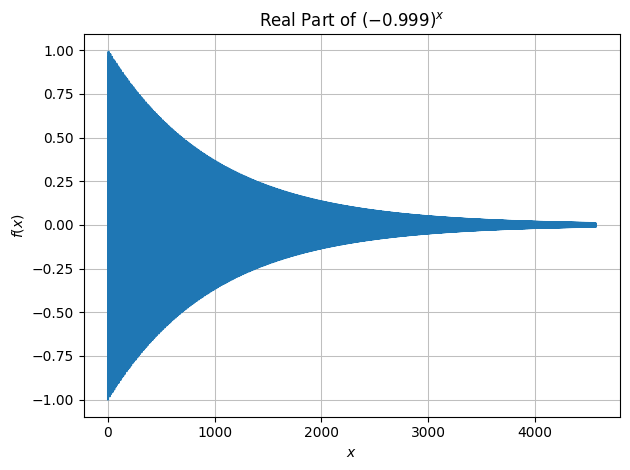

In [ ]:
from dtumathtools import *

x = symbols('x')
f = (-0.999)**x

plot = dtuplot.plot(re(f), (x, 1, 4567), n = 10000, title=f'Real Part of ${latex(f)}$', show=False)
plot.show()

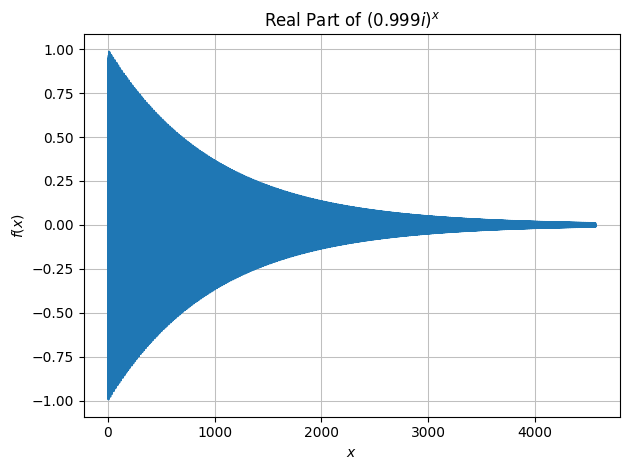

In [ ]:
f = (0.999 * I)**x

plot = dtuplot.plot(re(f), (x, 1, 4567), n = 10000, title=f'Real Part of ${latex(f)}$', show=False)
plot.show()

De konvergere meget langsomt.

# Analyse af PageRank Modeller og Undersøgelse af Dæmpning

## Opgave 38

vi kan tillade os at bruge den fordi den konvenger, og fordi det den konvengerer imod er approksimativt det samme som random surfs PageRanking.

## Opgave 39

In [ ]:
import matplotlib.pyplot as plt



    # Input: web og ranking er dictionary, eksempelvis som output fra funktionerne "make_web" og "random_surf".

    # Output: Grafisk repræsentation af webstrukturen med links som #pile og PageRank visualiseret ved størrelsen af hjemmesider.


def plot_ranking(web : dict, ranking, d=0.85):
    digraph = nx.DiGraph()


    digraph.add_nodes_from(web.keys())

    
    #     G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

    node_list = list(web.keys())
    node_sizes = [ ranking[page] * 10000 for page in web.keys()]

    for page in web.keys():
        p.add(ranking[page]*200)
        for link_to in web[page]:
            digraph.add_edge(page, link_to)
    # mdisplay(p)


    nx_args={'with_labels':True, 'node_color':"white", 'edgecolors':"black"}
    pos = nx.spring_layout(digraph, 1.5)
    nx.draw(digraph, pos, node_size=node_sizes, **nx_args)

W = make_web(100, 10, 0)
plot_ranking(W, matrix_PageRank(W, 100))


⎡0.0015        0.0015             0.0015        0.01  0.0015  0.0015  0.284833 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.10775       0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015       

## Opgave 40

In [ ]:
import math

def fiddle(web: dict, max_error: float, d: float):
    expected_pageranks = eigenvector_PageRank(W, d=d)
    pagerank_algorithms = [random_surf_damp, recursive_page_rank, matrix_PageRank]
    fiddle_dict = {}

    for algorithm in pagerank_algorithms:
        current_error = max_error + 1
        iteration_count = 1
        while current_error > max_error:
            iteration_count *= 1.3
            pagerank = algorithm(web = web, iterations = math.floor(iteration_count), d = d)

            current_error = 0

            for page in expected_pageranks:
                error = abs(expected_pageranks[page] - pagerank[page])
                if error > current_error:
                    current_error = error
        fiddle_dict[algorithm] = math.floor(iteration_count)
    return fiddle_dict



In [ ]:
mdisplay(fiddle(W, 0.001, 0.5))

{$p_{0}$: 0.01, $p_{10}$: 0.01, $p_{11}$: 0.01, $p_{12}$: 0.01, $p_{13}$: 0.01 ↪

↪ , $p_{14}$: 0.01, $p_{15}$: 0.01, $p_{16}$: 0.01, $p_{17}$: 0.01, $p_{18}$:  ↪

↪ 0.01, $p_{19}$: 0.01, $p_{1}$: 0.01, $p_{20}$: 0.01, $p_{21}$: 0.01, $p_{22} ↪

↪ $: 0.01, $p_{23}$: 0.01, $p_{24}$: 0.01, $p_{25}$: 0.01, $p_{26}$: 0.01, $p_ ↪

↪ {27}$: 0.01, $p_{28}$: 0.01, $p_{29}$: 0.01, $p_{2}$: 0.01, $p_{30}$: 0.01,  ↪

↪ $p_{31}$: 0.01, $p_{32}$: 0.01, $p_{33}$: 0.01, $p_{34}$: 0.01, $p_{35}$: 0. ↪

↪ 01, $p_{36}$: 0.01, $p_{37}$: 0.01, $p_{38}$: 0.01, $p_{39}$: 0.01, $p_{3}$: ↪

↪  0.01, $p_{40}$: 0.01, $p_{41}$: 0.01, $p_{42}$: 0.01, $p_{43}$: 0.01, $p_{4 ↪

↪ 4}$: 0.01, $p_{45}$: 0.01, $p_{46}$: 0.01, $p_{47}$: 0.01, $p_{48}$: 0.01, $ ↪

↪ p_{49}$: 0.01, $p_{4}$: 0.01, $p_{50}$: 0.01, $p_{51}$: 0.01, $p_{52}$: 0.01 ↪

↪ , $p_{53}$: 0.01, $p_{54}$: 0.01, $p_{55}$: 0.01, $p_{56}$: 0.01, $p_{57}$:  ↪

↪ 0.01, $p_{58}$: 0.01, $p_{59}$: 0.01, $p_{5}$: 0.01, $p_{60}$: 0.01, $p_{61} ↪

↪ $: 0.01, $p_{6

{$p_{0}$: 0.007672222222222222, $p_{10}$: 0.009011507936507937, $p_{11}$: 0.00 ↪

↪ 7463888888888889, $p_{12}$: 0.006630555555555555, $p_{13}$: 0.01021984126984 ↪

↪ 1271, $p_{14}$: 0.014289285714285714, $p_{15}$: 0.01121388888888889, $p_{16} ↪

↪ $: 0.00545, $p_{17}$: 0.009408333333333335, $p_{18}$: 0.00745, $p_{19}$: 0.0 ↪

↪ 06630555555555555, $p_{1}$: 0.011600793650793651, $p_{20}$: 0.01686666666666 ↪

↪ 6665, $p_{21}$: 0.012275396825396826, $p_{22}$: 0.013719841269841273, $p_{23 ↪

↪ }$: 0.008969841269841272, $p_{24}$: 0.010130555555555558, $p_{25}$: 0.006719 ↪

↪ 84126984127, $p_{26}$: 0.00975357142857143, $p_{27}$: 0.01162857142857143, $ ↪

↪ p_{28}$: 0.012255555555555556, $p_{29}$: 0.011442063492063493, $p_{2}$: 0.00 ↪

↪ 7900396825396826, $p_{30}$: 0.008741666666666667, $p_{31}$: 0.00790833333333 ↪

↪ 3333, $p_{32}$: 0.010061111111111113, $p_{33}$: 0.008575000000000001, $p_{34 ↪

↪ }$: 0.00923968253968254, $p_{35}$: 0.01145, $p_{36}$: 0.009983730158730159,  ↪

↪ $p_{37}$: 0.01

{$p_{0}$: 0.01, $p_{10}$: 0.01, $p_{11}$: 0.01, $p_{12}$: 0.01, $p_{13}$: 0.01 ↪

↪ , $p_{14}$: 0.01, $p_{15}$: 0.01, $p_{16}$: 0.01, $p_{17}$: 0.01, $p_{18}$:  ↪

↪ 0.01, $p_{19}$: 0.01, $p_{1}$: 0.01, $p_{20}$: 0.01, $p_{21}$: 0.01, $p_{22} ↪

↪ $: 0.01, $p_{23}$: 0.01, $p_{24}$: 0.01, $p_{25}$: 0.01, $p_{26}$: 0.01, $p_ ↪

↪ {27}$: 0.01, $p_{28}$: 0.01, $p_{29}$: 0.01, $p_{2}$: 0.01, $p_{30}$: 0.01,  ↪

↪ $p_{31}$: 0.01, $p_{32}$: 0.01, $p_{33}$: 0.01, $p_{34}$: 0.01, $p_{35}$: 0. ↪

↪ 01, $p_{36}$: 0.01, $p_{37}$: 0.01, $p_{38}$: 0.01, $p_{39}$: 0.01, $p_{3}$: ↪

↪  0.01, $p_{40}$: 0.01, $p_{41}$: 0.01, $p_{42}$: 0.01, $p_{43}$: 0.01, $p_{4 ↪

↪ 4}$: 0.01, $p_{45}$: 0.01, $p_{46}$: 0.01, $p_{47}$: 0.01, $p_{48}$: 0.01, $ ↪

↪ p_{49}$: 0.01, $p_{4}$: 0.01, $p_{50}$: 0.01, $p_{51}$: 0.01, $p_{52}$: 0.01 ↪

↪ , $p_{53}$: 0.01, $p_{54}$: 0.01, $p_{55}$: 0.01, $p_{56}$: 0.01, $p_{57}$:  ↪

↪ 0.01, $p_{58}$: 0.01, $p_{59}$: 0.01, $p_{5}$: 0.01, $p_{60}$: 0.01, $p_{61} ↪

↪ $: 0.01, $p_{6

{$p_{0}$: 0.007672222222222222, $p_{10}$: 0.009011507936507937, $p_{11}$: 0.00 ↪

↪ 7463888888888889, $p_{12}$: 0.006630555555555555, $p_{13}$: 0.01021984126984 ↪

↪ 1271, $p_{14}$: 0.014289285714285714, $p_{15}$: 0.01121388888888889, $p_{16} ↪

↪ $: 0.00545, $p_{17}$: 0.009408333333333335, $p_{18}$: 0.00745, $p_{19}$: 0.0 ↪

↪ 06630555555555555, $p_{1}$: 0.011600793650793651, $p_{20}$: 0.01686666666666 ↪

↪ 6665, $p_{21}$: 0.012275396825396826, $p_{22}$: 0.013719841269841273, $p_{23 ↪

↪ }$: 0.008969841269841272, $p_{24}$: 0.010130555555555558, $p_{25}$: 0.006719 ↪

↪ 84126984127, $p_{26}$: 0.00975357142857143, $p_{27}$: 0.01162857142857143, $ ↪

↪ p_{28}$: 0.012255555555555556, $p_{29}$: 0.011442063492063493, $p_{2}$: 0.00 ↪

↪ 7900396825396826, $p_{30}$: 0.008741666666666667, $p_{31}$: 0.00790833333333 ↪

↪ 3333, $p_{32}$: 0.010061111111111113, $p_{33}$: 0.008575000000000001, $p_{34 ↪

↪ }$: 0.00923968253968254, $p_{35}$: 0.01145, $p_{36}$: 0.009983730158730159,  ↪

↪ $p_{37}$: 0.01

{$p_{0}$: 0.01, $p_{10}$: 0.01, $p_{11}$: 0.01, $p_{12}$: 0.01, $p_{13}$: 0.01 ↪

↪ , $p_{14}$: 0.01, $p_{15}$: 0.01, $p_{16}$: 0.01, $p_{17}$: 0.01, $p_{18}$:  ↪

↪ 0.01, $p_{19}$: 0.01, $p_{1}$: 0.01, $p_{20}$: 0.01, $p_{21}$: 0.01, $p_{22} ↪

↪ $: 0.01, $p_{23}$: 0.01, $p_{24}$: 0.01, $p_{25}$: 0.01, $p_{26}$: 0.01, $p_ ↪

↪ {27}$: 0.01, $p_{28}$: 0.01, $p_{29}$: 0.01, $p_{2}$: 0.01, $p_{30}$: 0.01,  ↪

↪ $p_{31}$: 0.01, $p_{32}$: 0.01, $p_{33}$: 0.01, $p_{34}$: 0.01, $p_{35}$: 0. ↪

↪ 01, $p_{36}$: 0.01, $p_{37}$: 0.01, $p_{38}$: 0.01, $p_{39}$: 0.01, $p_{3}$: ↪

↪  0.01, $p_{40}$: 0.01, $p_{41}$: 0.01, $p_{42}$: 0.01, $p_{43}$: 0.01, $p_{4 ↪

↪ 4}$: 0.01, $p_{45}$: 0.01, $p_{46}$: 0.01, $p_{47}$: 0.01, $p_{48}$: 0.01, $ ↪

↪ p_{49}$: 0.01, $p_{4}$: 0.01, $p_{50}$: 0.01, $p_{51}$: 0.01, $p_{52}$: 0.01 ↪

↪ , $p_{53}$: 0.01, $p_{54}$: 0.01, $p_{55}$: 0.01, $p_{56}$: 0.01, $p_{57}$:  ↪

↪ 0.01, $p_{58}$: 0.01, $p_{59}$: 0.01, $p_{5}$: 0.01, $p_{60}$: 0.01, $p_{61} ↪

↪ $: 0.01, $p_{6

{$p_{0}$: 0.007672222222222222, $p_{10}$: 0.009011507936507937, $p_{11}$: 0.00 ↪

↪ 7463888888888889, $p_{12}$: 0.006630555555555555, $p_{13}$: 0.01021984126984 ↪

↪ 1271, $p_{14}$: 0.014289285714285714, $p_{15}$: 0.01121388888888889, $p_{16} ↪

↪ $: 0.00545, $p_{17}$: 0.009408333333333335, $p_{18}$: 0.00745, $p_{19}$: 0.0 ↪

↪ 06630555555555555, $p_{1}$: 0.011600793650793651, $p_{20}$: 0.01686666666666 ↪

↪ 6665, $p_{21}$: 0.012275396825396826, $p_{22}$: 0.013719841269841273, $p_{23 ↪

↪ }$: 0.008969841269841272, $p_{24}$: 0.010130555555555558, $p_{25}$: 0.006719 ↪

↪ 84126984127, $p_{26}$: 0.00975357142857143, $p_{27}$: 0.01162857142857143, $ ↪

↪ p_{28}$: 0.012255555555555556, $p_{29}$: 0.011442063492063493, $p_{2}$: 0.00 ↪

↪ 7900396825396826, $p_{30}$: 0.008741666666666667, $p_{31}$: 0.00790833333333 ↪

↪ 3333, $p_{32}$: 0.010061111111111113, $p_{33}$: 0.008575000000000001, $p_{34 ↪

↪ }$: 0.00923968253968254, $p_{35}$: 0.01145, $p_{36}$: 0.009983730158730159,  ↪

↪ $p_{37}$: 0.01

{$p_{0}$: 0.007181027116402117, $p_{10}$: 0.008609515873015873, $p_{11}$: 0.00 ↪

↪ 7329776014109348, $p_{12}$: 0.006748514991181658, $p_{13}$: 0.01083865939153 ↪

↪ 4392, $p_{14}$: 0.014832134920634923, $p_{15}$: 0.01050130930335097, $p_{16} ↪

↪ $: 0.00537930753968254, $p_{17}$: 0.010143135802469137, $p_{18}$: 0.00760819 ↪

↪ 6428571429, $p_{19}$: 0.006504274470899471, $p_{1}$: 0.010980702727387253, $ ↪

↪ p_{20}$: 0.01594205445326279, $p_{21}$: 0.01070935052910053, $p_{22}$: 0.014 ↪

↪ 88369403502142, $p_{23}$: 0.009359757275132274, $p_{24}$: 0.0111354021164021 ↪

↪ 16, $p_{25}$: 0.00653916833585286, $p_{26}$: 0.008770140873015874, $p_{27}$: ↪

↪  0.011966902494331067, $p_{28}$: 0.01202660692239859, $p_{29}$: 0.0118868921 ↪

↪ 0128496, $p_{2}$: 0.007958254535147393, $p_{30}$: 0.008401109788359788, $p_{ ↪

↪ 31}$: 0.007422141534391535, $p_{32}$: 0.008989662477954144, $p_{33}$: 0.0089 ↪

↪ 37591269841273, $p_{34}$: 0.008711490551776266, $p_{35}$: 0.0119082361111111 ↪

↪ 12, $p_{36}$: 

⎡0.005         0.005               0.005        0.01  0.005  0.005  0.17166666 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.0675        0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005        

⎡0.005         0.005               0.005        0.01  0.005  0.005  0.17166666 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.0675        0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005        

⎡0.005         0.005               0.005        0.01  0.005  0.005  0.17166666 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.0675        0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005        

⎡0.005         0.005               0.005        0.01  0.005  0.005  0.17166666 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.0675        0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005        

⎡0.005         0.005               0.005        0.01  0.005  0.005  0.17166666 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.0675        0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005        

⎡0.005         0.005               0.005        0.01  0.005  0.005  0.17166666 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.0675        0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005               0.005        0.01  0.005  0.005        0.00 ↪
⎢                                                                              ↪
⎢0.005         0.005        

{<function random_surf_damp at 0x00000170507F27A0>: 79353, <function recursive_page_rank at 0x000001707AE774C0>: 2, <function matrix_PageRank at 0x0000017077117420>: 4}

In [ ]:
start_time = time()

p.add(random_surf_damp(W, 10000, d = 0.85))
p.add(f"time: {time()-start_time}")
start_time = time()
p.add(matrix_PageRank(W, 100))
p.add(f"time: {time()-start_time}")
start_time = time()
p.add(recursive_page_rank(W, d=0.85))
p.add(f"time: {time()-start_time}")
start_time = time()
p.add(eigenvector_PageRank(W, 0.85))
p.add(f"time: {time()-start_time}")

mdisplay(p)


⎡0.0015        0.0015             0.0015        0.01  0.0015  0.0015  0.284833 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.10775       0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015             0.0015        0.01  0.0015  0.0015       0.0 ↪
⎢                                                                              ↪
⎢0.0015        0.0015       

{$p_{0}$: 0.01, $p_{10}$: 0.01, $p_{11}$: 0.01, $p_{12}$: 0.01, $p_{13}$: 0.01 ↪

↪ , $p_{14}$: 0.01, $p_{15}$: 0.01, $p_{16}$: 0.01, $p_{17}$: 0.01, $p_{18}$:  ↪

↪ 0.01, $p_{19}$: 0.01, $p_{1}$: 0.01, $p_{20}$: 0.01, $p_{21}$: 0.01, $p_{22} ↪

↪ $: 0.01, $p_{23}$: 0.01, $p_{24}$: 0.01, $p_{25}$: 0.01, $p_{26}$: 0.01, $p_ ↪

↪ {27}$: 0.01, $p_{28}$: 0.01, $p_{29}$: 0.01, $p_{2}$: 0.01, $p_{30}$: 0.01,  ↪

↪ $p_{31}$: 0.01, $p_{32}$: 0.01, $p_{33}$: 0.01, $p_{34}$: 0.01, $p_{35}$: 0. ↪

↪ 01, $p_{36}$: 0.01, $p_{37}$: 0.01, $p_{38}$: 0.01, $p_{39}$: 0.01, $p_{3}$: ↪

↪  0.01, $p_{40}$: 0.01, $p_{41}$: 0.01, $p_{42}$: 0.01, $p_{43}$: 0.01, $p_{4 ↪

↪ 4}$: 0.01, $p_{45}$: 0.01, $p_{46}$: 0.01, $p_{47}$: 0.01, $p_{48}$: 0.01, $ ↪

↪ p_{49}$: 0.01, $p_{4}$: 0.01, $p_{50}$: 0.01, $p_{51}$: 0.01, $p_{52}$: 0.01 ↪

↪ , $p_{53}$: 0.01, $p_{54}$: 0.01, $p_{55}$: 0.01, $p_{56}$: 0.01, $p_{57}$:  ↪

↪ 0.01, $p_{58}$: 0.01, $p_{59}$: 0.01, $p_{5}$: 0.01, $p_{60}$: 0.01, $p_{61} ↪

↪ $: 0.01, $p_{6

{$p_{0}$: 0.006042777777777778, $p_{10}$: 0.008319563492063493, $p_{11}$: 0.00 ↪

↪ 5688611111111111, $p_{12}$: 0.0042719444444444445, $p_{13}$: 0.0103737301587 ↪

↪ 30159, $p_{14}$: 0.017291785714285718, $p_{15}$: 0.012063611111111112, $p_{1 ↪

↪ 6}$: 0.0022650000000000005, $p_{17}$: 0.008994166666666668, $p_{18}$: 0.0056 ↪

↪ 65, $p_{19}$: 0.0042719444444444445, $p_{1}$: 0.012721349206349205, $p_{20}$ ↪

↪ : 0.021673333333333336, $p_{21}$: 0.013868174603174603, $p_{22}$: 0.01632373 ↪

↪ 015873016, $p_{23}$: 0.00824873015873016, $p_{24}$: 0.010221944444444445, $p ↪

↪ _{25}$: 0.004423730158730159, $p_{26}$: 0.009581071428571428, $p_{27}$: 0.01 ↪

↪ 276857142857143, $p_{28}$: 0.013834444444444444, $p_{29}$: 0.012451507936507 ↪

↪ 936, $p_{2}$: 0.006430674603174603, $p_{30}$: 0.007860833333333334, $p_{31}$ ↪

↪ : 0.006444166666666667, $p_{32}$: 0.010103888888888888, $p_{33}$: 0.00757750 ↪

↪ 0000000001, $p_{34}$: 0.008707460317460319, $p_{35}$: 0.012465, $p_{36}$: 0. ↪

↪ 00997234126984

{$p_{0}$: 0.004623223921957673, $p_{10}$: 0.007157806428571429, $p_{11}$: 0.00 ↪

↪ 5301024902998237, $p_{12}$: 0.004612847213403881, $p_{13}$: 0.01216211453042 ↪

↪ 328, $p_{14}$: 0.01886061992063492, $p_{15}$: 0.010004256108906524, $p_{16}$ ↪

↪ : 0.00206069878968254, $p_{17}$: 0.011117745802469136, $p_{18}$: 0.006122187 ↪

↪ 6785714285, $p_{19}$: 0.0039069921097883605, $p_{1}$: 0.010929286437704711,  ↪

↪ $p_{20}$: 0.019001204036596123, $p_{21}$: 0.009342300806878307, $p_{22}$: 0. ↪

↪ 01968726465010078, $p_{23}$: 0.009375587414021164, $p_{24}$: 0.0131259510052 ↪

↪ 91004, $p_{25}$: 0.0039015853795036533, $p_{26}$: 0.006738957123015874, $p_{ ↪

↪ 27}$: 0.013746348208616779, $p_{28}$: 0.013172782894620812, $p_{29}$: 0.0137 ↪

↪ 37062617157975, $p_{2}$: 0.006597883384353742, $p_{30}$: 0.00687662395502645 ↪

↪ 6, $p_{31}$: 0.005039072367724868, $p_{32}$: 0.007007402339065257, $p_{33}$: ↪

↪  0.00862538876984127, $p_{34}$: 0.007180985472411187, $p_{35}$: 0.0137893023 ↪

↪ 61111111, $p_{

{$p_{0}$: 0.005125995095885981, $p_{10}$: 0.007814442264299257, $p_{11}$: 0.00 ↪

↪ 5337965498741838, $p_{12}$: 0.004238099059640014, $p_{13}$: 0.01233664247563 ↪

↪ 0565, $p_{14}$: 0.017953448316685723, $p_{15}$: 0.009816508664126651, $p_{16 ↪

↪ }$: 0.002046061166726663, $p_{17}$: 0.011754087471533576, $p_{18}$: 0.006168 ↪

↪ 895185994741, $p_{19}$: 0.0045292295216800265, $p_{1}$: 0.012868034653615504 ↪

↪ , $p_{20}$: 0.01803390540625086, $p_{21}$: 0.008820520296340983, $p_{22}$: 0 ↪

↪ .017246354001662648, $p_{23}$: 0.010572900568258586, $p_{24}$: 0.01172415303 ↪

↪ 7274318, $p_{25}$: 0.00348973499113055, $p_{26}$: 0.006736501520065429, $p_{ ↪

↪ 27}$: 0.013015786053743284, $p_{28}$: 0.01380802442294368, $p_{29}$: 0.01431 ↪

↪ 4230590205236, $p_{2}$: 0.006810152721971871, $p_{30}$: 0.006646052092753764 ↪

↪ , $p_{31}$: 0.00497346423104689, $p_{32}$: 0.006978610389894932, $p_{33}$: 0 ↪

↪ .008597562458564578, $p_{34}$: 0.007009913426530194, $p_{35}$: 0.01417031045 ↪

↪ 4360907, $p_{3

{$p_{0}$: 0.0049294388355050015, $p_{10}$: 0.007632999794796435, $p_{11}$: 0.0 ↪

↪ 05285045582365387, $p_{12}$: 0.00424514134995134, $p_{13}$: 0.01217515595827 ↪

↪ 7643, $p_{14}$: 0.017988364504094575, $p_{15}$: 0.010021420391078955, $p_{16 ↪

↪ }$: 0.002013628307601748, $p_{17}$: 0.01170245784352165, $p_{18}$: 0.0064783 ↪

↪ 4256629108, $p_{19}$: 0.004423740427352937, $p_{1}$: 0.012421737917725047, $ ↪

↪ p_{20}$: 0.017944096160896855, $p_{21}$: 0.008413787610955573, $p_{22}$: 0.0 ↪

↪ 16333962296311434, $p_{23}$: 0.01072964893503161, $p_{24}$: 0.01145187894923 ↪

↪ 7045, $p_{25}$: 0.0034904888260815364, $p_{26}$: 0.007030679802399272, $p_{2 ↪

↪ 7}$: 0.013291037203106903, $p_{28}$: 0.013595571529386254, $p_{29}$: 0.01451 ↪

↪ 0442951407373, $p_{2}$: 0.006568697515908445, $p_{30}$: 0.006835172709665422 ↪

↪ , $p_{31}$: 0.005169994517072034, $p_{32}$: 0.007090107561341346, $p_{33}$:  ↪

↪ 0.008616191090601145, $p_{34}$: 0.0067701090149521375, $p_{35}$: 0.014157904 ↪

↪ 332195222, $p_

{$p_{0}$: 0.004892121715113881, $p_{10}$: 0.0076204872637310244, $p_{11}$: 0.0 ↪

↪ 05346107232480365, $p_{12}$: 0.0041324694064274565, $p_{13}$: 0.012224899235 ↪

↪ 922525, $p_{14}$: 0.018176215194576618, $p_{15}$: 0.009941259646731782, $p_{ ↪

↪ 16}$: 0.002013315455307292, $p_{17}$: 0.0115231852852228, $p_{18}$: 0.006585 ↪

↪ 1055937116475, $p_{19}$: 0.004406575601290494, $p_{1}$: 0.012234186526397467 ↪

↪ , $p_{20}$: 0.017843415457756244, $p_{21}$: 0.008406453148479324, $p_{22}$:  ↪

↪ 0.016353782486807435, $p_{23}$: 0.010709610143367054, $p_{24}$: 0.0115385233 ↪

↪ 88232299, $p_{25}$: 0.0034635852943122273, $p_{26}$: 0.006986737470860643, $ ↪

↪ p_{27}$: 0.013500526018081762, $p_{28}$: 0.013563262072701941, $p_{29}$: 0.0 ↪

↪ 14584080561204409, $p_{2}$: 0.006471985256314847, $p_{30}$: 0.00670944645441 ↪

↪ 6089, $p_{31}$: 0.005292097227016607, $p_{32}$: 0.007061283035674859, $p_{33 ↪

↪ }$: 0.008807983222495777, $p_{34}$: 0.006849118155462434, $p_{35}$: 0.014096 ↪

↪ 057415098047, 

{$p_{0}$: 0.004938076332975039, $p_{10}$: 0.0076015140405856045, $p_{11}$: 0.0 ↪

↪ 05342514349955015, $p_{12}$: 0.004144915797253089, $p_{13}$: 0.0121730209713 ↪

↪ 98066, $p_{14}$: 0.018141217640520964, $p_{15}$: 0.00997819015957704, $p_{16 ↪

↪ }$: 0.0020160796876749765, $p_{17}$: 0.011598614847330156, $p_{18}$: 0.00659 ↪

↪ 3779848002736, $p_{19}$: 0.0044207964111240465, $p_{1}$: 0.01220717832061586 ↪

↪ 5, $p_{20}$: 0.017840526255450368, $p_{21}$: 0.008346464749889811, $p_{22}$: ↪

↪  0.01650863333287405, $p_{23}$: 0.010834317759583625, $p_{24}$: 0.0114421476 ↪

↪ 74148745, $p_{25}$: 0.00346161800469639, $p_{26}$: 0.006973239939580586, $p_ ↪

↪ {27}$: 0.013586186935547424, $p_{28}$: 0.013533322823769236, $p_{29}$: 0.014 ↪

↪ 776582768936886, $p_{2}$: 0.006511536664799857, $p_{30}$: 0.0066753513282210 ↪

↪ 3, $p_{31}$: 0.005298487811235155, $p_{32}$: 0.007098921375736662, $p_{33}$: ↪

↪  0.008788159109916998, $p_{34}$: 0.00686705201804323, $p_{35}$: 0.0140737130 ↪

↪ 92416567, $p_{

{$p_{0}$: 0.00495193621087401, $p_{10}$: 0.007619005506446646, $p_{11}$: 0.005 ↪

↪ 333229610101258, $p_{12}$: 0.004158872334474135, $p_{13}$: 0.012189683650411 ↪

↪ 225, $p_{14}$: 0.0181658937982294, $p_{15}$: 0.009954168307646182, $p_{16}$: ↪

↪  0.002015384583697895, $p_{17}$: 0.011629021462964637, $p_{18}$: 0.006575078 ↪

↪ 504754914, $p_{19}$: 0.004413587449130434, $p_{1}$: 0.012201740422830364, $p ↪

↪ _{20}$: 0.017863418617397597, $p_{21}$: 0.00834429184674947, $p_{22}$: 0.016 ↪

↪ 281093916819256, $p_{23}$: 0.010824198622915265, $p_{24}$: 0.011450818790550 ↪

↪ 519, $p_{25}$: 0.003459269163953604, $p_{26}$: 0.006980880224285166, $p_{27} ↪

↪ $: 0.013568545727050456, $p_{28}$: 0.013544999625564914, $p_{29}$: 0.0148114 ↪

↪ 84191727868, $p_{2}$: 0.006528685718990284, $p_{30}$: 0.006685655462477222,  ↪

↪ $p_{31}$: 0.005289480119091397, $p_{32}$: 0.007104200742154328, $p_{33}$: 0. ↪

↪ 008733576318403817, $p_{34}$: 0.006867361031786027, $p_{35}$: 0.014101841140 ↪

↪ 615712, $p_{36

{$p_{0}$: 0.0049591789547022355, $p_{10}$: 0.007619050272769069, $p_{11}$: 0.0 ↪

↪ 05337124537073606, $p_{12}$: 0.004162744637026054, $p_{13}$: 0.0121859543350 ↪

↪ 44458, $p_{14}$: 0.01816389102806858, $p_{15}$: 0.0099556252257902, $p_{16}$ ↪

↪ : 0.00201505277253382, $p_{17}$: 0.01163674198610229, $p_{18}$: 0.0065850929 ↪

↪ 422009465, $p_{19}$: 0.0044076927378737885, $p_{1}$: 0.01220217661175584, $p ↪

↪ _{20}$: 0.017858402189650523, $p_{21}$: 0.008351024839666907, $p_{22}$: 0.01 ↪

↪ 6214546102632003, $p_{23}$: 0.01081406499265702, $p_{24}$: 0.011458882812521 ↪

↪ 018, $p_{25}$: 0.0034592179199021003, $p_{26}$: 0.006985252033342244, $p_{27 ↪

↪ }$: 0.013581216766635094, $p_{28}$: 0.013536400270185617, $p_{29}$: 0.014832 ↪

↪ 064106318562, $p_{2}$: 0.006535899212455542, $p_{30}$: 0.0066936402183324665 ↪

↪ , $p_{31}$: 0.005298649359820368, $p_{32}$: 0.0071005433310870345, $p_{33}$: ↪

↪  0.008743064464989361, $p_{34}$: 0.0068645819738044345, $p_{35}$: 0.01410852 ↪

↪ 2830632388, $p

{$p_{0}$: 0.00496399068519108, $p_{10}$: 0.00762266729047548, $p_{11}$: 0.0053 ↪

↪ 384601660646375, $p_{12}$: 0.004161288650646671, $p_{13}$: 0.012188005900697 ↪

↪ 789, $p_{14}$: 0.01816580211964405, $p_{15}$: 0.009957362258959468, $p_{16}$ ↪

↪ : 0.0020151810670110334, $p_{17}$: 0.011638811422443853, $p_{18}$: 0.0065858 ↪

↪ 97240796441, $p_{19}$: 0.004407107281751451, $p_{1}$: 0.012184261372165996,  ↪

↪ $p_{20}$: 0.017864954089850855, $p_{21}$: 0.008355350724587362, $p_{22}$: 0. ↪

↪ 016213960857407974, $p_{23}$: 0.010813896826765831, $p_{24}$: 0.011464348704 ↪

↪ 154581, $p_{25}$: 0.0034584602727608252, $p_{26}$: 0.006987453933483236, $p_ ↪

↪ {27}$: 0.013578303562587001, $p_{28}$: 0.01354230009252038, $p_{29}$: 0.0148 ↪

↪ 46745622681888, $p_{2}$: 0.006542282666373372, $p_{30}$: 0.00669511998707543 ↪

↪ 8, $p_{31}$: 0.0053016778307881296, $p_{32}$: 0.007104585484531647, $p_{33}$ ↪

↪ : 0.008750903170912894, $p_{34}$: 0.0068691987071202, $p_{35}$: 0.0141095876 ↪

↪ 06596294, $p_{

{$p_{0}$: 0.0049650808314051905, $p_{10}$: 0.0076253461848025976, $p_{11}$: 0. ↪

↪ 005338107852420073, $p_{12}$: 0.004162659980596427, $p_{13}$: 0.012186167742 ↪

↪ 617375, $p_{14}$: 0.018165209685838207, $p_{15}$: 0.009958255468893553, $p_{ ↪

↪ 16}$: 0.0020153801835968194, $p_{17}$: 0.011639890611984944, $p_{18}$: 0.006 ↪

↪ 586791063908846, $p_{19}$: 0.0044068656104630155, $p_{1}$: 0.012176390622804 ↪

↪ 46, $p_{20}$: 0.01787146886669439, $p_{21}$: 0.008355524024363539, $p_{22}$: ↪

↪  0.016221103261280723, $p_{23}$: 0.010821329312278909, $p_{24}$: 0.011466757 ↪

↪ 190310789, $p_{25}$: 0.003459263051281771, $p_{26}$: 0.006988811611279285, $ ↪

↪ p_{27}$: 0.01357707621109214, $p_{28}$: 0.013545476379771278, $p_{29}$: 0.01 ↪

↪ 4852810724867065, $p_{2}$: 0.0065437512028655356, $p_{30}$: 0.00669864196509 ↪

↪ 9292, $p_{31}$: 0.00530197259712305, $p_{32}$: 0.007107309655559023, $p_{33} ↪

↪ $: 0.008752660889291641, $p_{34}$: 0.006869966092818969, $p_{35}$: 0.0141102 ↪

↪ 24817164693, $

{$p_{0}$: 0.004965987311298711, $p_{10}$: 0.007626595877940859, $p_{11}$: 0.00 ↪

↪ 53381354567661795, $p_{12}$: 0.004162808512328836, $p_{13}$: 0.0121875198852 ↪

↪ 3567, $p_{14}$: 0.018167153802593716, $p_{15}$: 0.009956850292160934, $p_{16 ↪

↪ }$: 0.002015424831040188, $p_{17}$: 0.011641520738247969, $p_{18}$: 0.006587 ↪

↪ 005388665901, $p_{19}$: 0.004407194754523321, $p_{1}$: 0.012172785192109934, ↪

↪  $p_{20}$: 0.01787139176752267, $p_{21}$: 0.008356976685267482, $p_{22}$: 0. ↪

↪ 01620342728056336, $p_{23}$: 0.010821209176631102, $p_{24}$: 0.0114678306512 ↪

↪ 11345, $p_{25}$: 0.0034588219218682674, $p_{26}$: 0.00698976076596061, $p_{2 ↪

↪ 7}$: 0.013574012511879457, $p_{28}$: 0.013544553459047547, $p_{29}$: 0.01485 ↪

↪ 4517667048324, $p_{2}$: 0.006544815081879458, $p_{30}$: 0.006699758494750008 ↪

↪ , $p_{31}$: 0.0053018765080398355, $p_{32}$: 0.007107424017829697, $p_{33}$: ↪

↪  0.008750808036869555, $p_{34}$: 0.006870491671105877, $p_{35}$: 0.014112521 ↪

↪ 544961659, $p_

{$p_{0}$: 0.004966263156359509, $p_{10}$: 0.007627018159291166, $p_{11}$: 0.00 ↪

↪ 5338519963647587, $p_{12}$: 0.004162578418753539, $p_{13}$: 0.01218755841053 ↪

↪ 652, $p_{14}$: 0.018168047911888557, $p_{15}$: 0.00995679058203872, $p_{16}$ ↪

↪ : 0.002015427984661017, $p_{17}$: 0.011642141768052833, $p_{18}$: 0.00658692 ↪

↪ 9444428475, $p_{19}$: 0.004407252625043445, $p_{1}$: 0.012172301069049712, $ ↪

↪ p_{20}$: 0.017871593820561874, $p_{21}$: 0.008357062177482073, $p_{22}$: 0.0 ↪

↪ 16198865732589857, $p_{23}$: 0.01082083617570147, $p_{24}$: 0.01146828065728 ↪

↪ 627, $p_{25}$: 0.0034587290555635184, $p_{26}$: 0.0069903145723642455, $p_{2 ↪

↪ 7}$: 0.01357414016845814, $p_{28}$: 0.01354477284137576, $p_{29}$: 0.0148552 ↪

↪ 20468705388, $p_{2}$: 0.006545212614919653, $p_{30}$: 0.006700002497723768,  ↪

↪ $p_{31}$: 0.005301991280480552, $p_{32}$: 0.007107412372872861, $p_{33}$: 0. ↪

↪ 00875054577097654, $p_{34}$: 0.0068703801210127395, $p_{35}$: 0.014112862056 ↪

↪ 500449, $p_{36

{$p_{0}$: 0.004966665836383914, $p_{10}$: 0.007627187405599011, $p_{11}$: 0.00 ↪

↪ 5338618133806499, $p_{12}$: 0.00416237383789215, $p_{13}$: 0.012187482629233 ↪

↪ 342, $p_{14}$: 0.01816832167938257, $p_{15}$: 0.009957049932056443, $p_{16}$ ↪

↪ : 0.002015445145267206, $p_{17}$: 0.011642370926949095, $p_{18}$: 0.00658720 ↪

↪ 6676221535, $p_{19}$: 0.004407225394656762, $p_{1}$: 0.012170915851849078, $ ↪

↪ p_{20}$: 0.017871966149713304, $p_{21}$: 0.008357052682676083, $p_{22}$: 0.0 ↪

↪ 16199115604361724, $p_{23}$: 0.010821024111837281, $p_{24}$: 0.0114687120756 ↪

↪ 06258, $p_{25}$: 0.003458684660867811, $p_{26}$: 0.006990530168239196, $p_{2 ↪

↪ 7}$: 0.013574011911396004, $p_{28}$: 0.013545170073662226, $p_{29}$: 0.01485 ↪

↪ 5990929974144, $p_{2}$: 0.006545708595666453, $p_{30}$: 0.006700198896224852 ↪

↪ , $p_{31}$: 0.005302247369755686, $p_{32}$: 0.007107519712463526, $p_{33}$:  ↪

↪ 0.008750847836725835, $p_{34}$: 0.0068704496375033616, $p_{35}$: 0.014112861 ↪

↪ 84668411, $p_{

{$p_{0}$: 0.004966702205617615, $p_{10}$: 0.007627288930173831, $p_{11}$: 0.00 ↪

↪ 5338613656857961, $p_{12}$: 0.00416245661048206, $p_{13}$: 0.012187482307779 ↪

↪ 482, $p_{14}$: 0.018168335412294304, $p_{15}$: 0.009956947188688402, $p_{16} ↪

↪ $: 0.002015463317514091, $p_{17}$: 0.011642479331586126, $p_{18}$: 0.0065873 ↪

↪ 08656897019, $p_{19}$: 0.004407259701798159, $p_{1}$: 0.012170146688061404,  ↪

↪ $p_{20}$: 0.017872349154532185, $p_{21}$: 0.008357047821492611, $p_{22}$: 0. ↪

↪ 01619944868169061, $p_{23}$: 0.010821256079502552, $p_{24}$: 0.0114690435843 ↪

↪ 72306, $p_{25}$: 0.003458765009466422, $p_{26}$: 0.006990644022979037, $p_{2 ↪

↪ 7}$: 0.013573766556627828, $p_{28}$: 0.013545339602508547, $p_{29}$: 0.01485 ↪

↪ 6180484933496, $p_{2}$: 0.006545803568932939, $p_{30}$: 0.006700467910591288 ↪

↪ , $p_{31}$: 0.005302318316446504, $p_{32}$: 0.00710771234230707, $p_{33}$: 0 ↪

↪ .008750991289634705, $p_{34}$: 0.006870540543298671, $p_{35}$: 0.01411302715 ↪

↪ 3626988, $p_{3

{$p_{0}$: 0.004966761521097037, $p_{10}$: 0.007627357681902505, $p_{11}$: 0.00 ↪

↪ 5338646545674929, $p_{12}$: 0.004162448475049072, $p_{13}$: 0.01218758691934 ↪

↪ 3917, $p_{14}$: 0.018168435758548238, $p_{15}$: 0.009956827994975683, $p_{16 ↪

↪ }$: 0.0020154686984556747, $p_{17}$: 0.011642590356821067, $p_{18}$: 0.00658 ↪

↪ 7353884885958, $p_{19}$: 0.00440724817382096, $p_{1}$: 0.012169928657004876, ↪

↪  $p_{20}$: 0.017872416911354706, $p_{21}$: 0.008357166835275378, $p_{22}$: 0 ↪

↪ .016198101327373798, $p_{23}$: 0.01082118554831416, $p_{24}$: 0.011469101163 ↪

↪ 418201, $p_{25}$: 0.0034587317365656783, $p_{26}$: 0.0069907257667189355, $p ↪

↪ _{27}$: 0.013573560193496818, $p_{28}$: 0.013545321861407878, $p_{29}$: 0.01 ↪

↪ 4856322742553829, $p_{2}$: 0.00654587907671033, $p_{30}$: 0.0067005328847599 ↪

↪ 99, $p_{31}$: 0.005302349971480785, $p_{32}$: 0.007107706065142636, $p_{33}$ ↪

↪ : 0.008750906745894564, $p_{34}$: 0.006870576765636404, $p_{35}$: 0.01411317 ↪

↪ 1254118552, $p

{$p_{0}$: 0.004966782469036205, $p_{10}$: 0.007627384393237385, $p_{11}$: 0.00 ↪

↪ 5338669248041619, $p_{12}$: 0.004162428993197202, $p_{13}$: 0.01218759164659 ↪

↪ 3667, $p_{14}$: 0.018168466824930608, $p_{15}$: 0.009956836339183869, $p_{16 ↪

↪ }$: 0.0020154691331492613, $p_{17}$: 0.011642650609182395, $p_{18}$: 0.00658 ↪

↪ 7368818134118, $p_{19}$: 0.004407244198979693, $p_{1}$: 0.0121698956267452,  ↪

↪ $p_{20}$: 0.01787243798795811, $p_{21}$: 0.00835717152001727, $p_{22}$: 0.01 ↪

↪ 619783189753167, $p_{23}$: 0.010821215338097276, $p_{24}$: 0.011469126717776 ↪

↪ 041, $p_{25}$: 0.0034587252223109402, $p_{26}$: 0.00699075805129987, $p_{27} ↪

↪ $: 0.013573527981657924, $p_{28}$: 0.013545344222760589, $p_{29}$: 0.0148563 ↪

↪ 67370434196, $p_{2}$: 0.006545914644074897, $p_{30}$: 0.00670055799960642, $ ↪

↪ p_{31}$: 0.00530236950932481, $p_{32}$: 0.007107717861045556, $p_{33}$: 0.00 ↪

↪ 8750892948783645, $p_{34}$: 0.006870575557730153, $p_{35}$: 0.01411319513314 ↪

↪ 1604, $p_{36}$

{$p_{0}$: 0.004966801830989227, $p_{10}$: 0.007627395913636741, $p_{11}$: 0.00 ↪

↪ 5338676655208541, $p_{12}$: 0.004162418234127505, $p_{13}$: 0.01218758272071 ↪

↪ 2891, $p_{14}$: 0.018168472633626257, $p_{15}$: 0.009956849472639506, $p_{16 ↪

↪ }$: 0.00201547062000388, $p_{17}$: 0.011642659259075105, $p_{18}$: 0.0065873 ↪

↪ 93433629884, $p_{19}$: 0.004407253448344944, $p_{1}$: 0.012169765719582788,  ↪

↪ $p_{20}$: 0.017872465494342314, $p_{21}$: 0.008357172593847401, $p_{22}$: 0. ↪

↪ 016197853218324378, $p_{23}$: 0.010821229240951072, $p_{24}$: 0.011469153593 ↪

↪ 095756, $p_{25}$: 0.003458723272777447, $p_{26}$: 0.006990776556714951, $p_{ ↪

↪ 27}$: 0.013573507196583704, $p_{28}$: 0.013545377732569058, $p_{29}$: 0.0148 ↪

↪ 56428029758796, $p_{2}$: 0.006545939964847343, $p_{30}$: 0.00670057559102949 ↪

↪ 8, $p_{31}$: 0.0053023916262563975, $p_{32}$: 0.007107731458716696, $p_{33}$ ↪

↪ : 0.008750910794034934, $p_{34}$: 0.006870580463484054, $p_{35}$: 0.01411319 ↪

↪ 037918419, $p_

{$p_{0}$: 0.004966801523100647, $p_{10}$: 0.007627404197908638, $p_{11}$: 0.00 ↪

↪ 5338675525084997, $p_{12}$: 0.0041624215464434395, $p_{13}$: 0.0121875869219 ↪

↪ 2609, $p_{14}$: 0.018168492407843708, $p_{15}$: 0.009956839690556775, $p_{16 ↪

↪ }$: 0.0020154718247323176, $p_{17}$: 0.01164266708709324, $p_{18}$: 0.006587 ↪

↪ 4008096383566, $p_{19}$: 0.004407256767044015, $p_{1}$: 0.012169711264542747 ↪

↪ , $p_{20}$: 0.017872488012611248, $p_{21}$: 0.008357176723549603, $p_{22}$:  ↪

↪ 0.01619786250011907, $p_{23}$: 0.010821242362193374, $p_{24}$: 0.01146917042 ↪

↪ 1810445, $p_{25}$: 0.003458727558852839, $p_{26}$: 0.006990786126314687, $p_ ↪

↪ {27}$: 0.01357349806726707, $p_{28}$: 0.01354538044386217, $p_{29}$: 0.01485 ↪

↪ 6435098577722, $p_{2}$: 0.006545943028884808, $p_{30}$: 0.006700591723851744 ↪

↪ , $p_{31}$: 0.005302395086621027, $p_{32}$: 0.007107743395293464, $p_{33}$:  ↪

↪ 0.008750922406812684, $p_{34}$: 0.006870586601240686, $p_{35}$: 0.0141132097 ↪

↪ 7769756, $p_{3

{$p_{0}$: 0.004966807455748194, $p_{10}$: 0.00762740923076959, $p_{11}$: 0.005 ↪

↪ 338678854754911, $p_{12}$: 0.004162420043234227, $p_{13}$: 0.012187593577776 ↪

↪ 9, $p_{14}$: 0.018168497431700462, $p_{15}$: 0.009956832411499682, $p_{16}$: ↪

↪  0.002015472037418133, $p_{17}$: 0.011642675377428635, $p_{18}$: 0.006587403 ↪

↪ 326689727, $p_{19}$: 0.004407255835649279, $p_{1}$: 0.012169700004159503, $p ↪

↪ _{20}$: 0.017872492555860202, $p_{21}$: 0.008357182542610106, $p_{22}$: 0.01 ↪

↪ 6197763124839268, $p_{23}$: 0.010821232779131443, $p_{24}$: 0.01146917529723 ↪

↪ 8305, $p_{25}$: 0.0034587252782746457, $p_{26}$: 0.006990792516240457, $p_{2 ↪

↪ 7}$: 0.01357348410791237, $p_{28}$: 0.013545379223814364, $p_{29}$: 0.014856 ↪

↪ 446701665105, $p_{2}$: 0.006545949863860384, $p_{30}$: 0.006700593232888175, ↪

↪  $p_{31}$: 0.00530239771723342, $p_{32}$: 0.007107741467558759, $p_{33}$: 0. ↪

↪ 008750913790107907, $p_{34}$: 0.006870589448990901, $p_{35}$: 0.014113217196 ↪

↪ 874786, $p_{36

{$p_{0}$: 0.004966808903628622, $p_{10}$: 0.007627410916807601, $p_{11}$: 0.00 ↪

↪ 5338680173275194, $p_{12}$: 0.004162419256179642, $p_{13}$: 0.01218759348441 ↪

↪ 6734, $p_{14}$: 0.01816849898132725, $p_{15}$: 0.00995683338350679, $p_{16}$ ↪

↪ : 0.0020154721574134156, $p_{17}$: 0.011642679896479862, $p_{18}$: 0.0065874 ↪

↪ 04331050932, $p_{19}$: 0.004407254905613228, $p_{1}$: 0.012169696548766967,  ↪

↪ $p_{20}$: 0.017872494854806128, $p_{21}$: 0.008357182151143797, $p_{22}$: 0. ↪

↪ 01619774767202456, $p_{23}$: 0.010821235788123855, $p_{24}$: 0.0114691772860 ↪

↪ 81145, $p_{25}$: 0.003458725333745598, $p_{26}$: 0.006990794470735102, $p_{2 ↪

↪ 7}$: 0.013573481443654127, $p_{28}$: 0.013545382467713757, $p_{29}$: 0.01485 ↪

↪ 6450488006675, $p_{2}$: 0.006545952816500404, $p_{30}$: 0.006700595712395545 ↪

↪ , $p_{31}$: 0.0053023992362646434, $p_{32}$: 0.007107743101887489, $p_{33}$: ↪

↪  0.008750913551872174, $p_{34}$: 0.006870588820364028, $p_{35}$: 0.014113218 ↪

↪ 941190988, $p_

{$p_{0}$: 0.004966810311665104, $p_{10}$: 0.0076274117238560365, $p_{11}$: 0.0 ↪

↪ 05338680662958524, $p_{12}$: 0.004162418568770319, $p_{13}$: 0.0121875932563 ↪

↪ 32068, $p_{14}$: 0.0181684995076364, $p_{15}$: 0.00995683415476973, $p_{16}$ ↪

↪ : 0.002015472274341258, $p_{17}$: 0.01164268054627741, $p_{18}$: 0.006587406 ↪

↪ 325278799, $p_{19}$: 0.004407255606092801, $p_{1}$: 0.012169686667601856, $p ↪

↪ _{20}$: 0.01787249714745648, $p_{21}$: 0.00835718277890351, $p_{22}$: 0.0161 ↪

↪ 9774925994088, $p_{23}$: 0.010821236724953677, $p_{24}$: 0.01146917984832262 ↪

↪ , $p_{25}$: 0.0034587252473100892, $p_{26}$: 0.006990795787589323, $p_{27}$: ↪

↪  0.013573479071189552, $p_{28}$: 0.01354538451909825, $p_{29}$: 0.0148564545 ↪

↪ 4839321, $p_{2}$: 0.006545954552920776, $p_{30}$: 0.006700597371204919, $p_{ ↪

↪ 31}$: 0.005302400840725294, $p_{32}$: 0.007107744169882421, $p_{33}$: 0.0087 ↪

↪ 5091511821823, $p_{34}$: 0.00687058928284391, $p_{35}$: 0.014113219314586553 ↪

↪ , $p_{36}$: 0.

{$p_{0}$: 0.004966810178318896, $p_{10}$: 0.007627412366182998, $p_{11}$: 0.00 ↪

↪ 5338680667113886, $p_{12}$: 0.004162418811996248, $p_{13}$: 0.01218759374004 ↪

↪ 9747, $p_{14}$: 0.018168500854879095, $p_{15}$: 0.009956833351701389, $p_{16 ↪

↪ }$: 0.002015472360194161, $p_{17}$: 0.011642681091861682, $p_{18}$: 0.006587 ↪

↪ 406823258751, $p_{19}$: 0.004407255839646578, $p_{1}$: 0.012169682699859772, ↪

↪  $p_{20}$: 0.01787249885178598, $p_{21}$: 0.008357183231870824, $p_{22}$: 0. ↪

↪ 01619774897590151, $p_{23}$: 0.010821237646215336, $p_{24}$: 0.0114691809494 ↪

↪ 42253, $p_{25}$: 0.003458725493513529, $p_{26}$: 0.006990796594565956, $p_{2 ↪

↪ 7}$: 0.013573478450989405, $p_{28}$: 0.01354538469840518, $p_{29}$: 0.014856 ↪

↪ 455167734768, $p_{2}$: 0.006545954710385069, $p_{30}$: 0.006700598447382833, ↪

↪  $p_{31}$: 0.005302401127328728, $p_{32}$: 0.007107744997784061, $p_{33}$: 0 ↪

↪ .00875091585326153, $p_{34}$: 0.006870589758853416, $p_{35}$: 0.014113220722 ↪

↪ 882952, $p_{36

{$p_{0}$: 0.004966810630756957, $p_{10}$: 0.007627412764233977, $p_{11}$: 0.00 ↪

↪ 5338680914262745, $p_{12}$: 0.00416241863568728, $p_{13}$: 0.012187594199936 ↪

↪ 064, $p_{14}$: 0.01816850127681277, $p_{15}$: 0.009956832908084013, $p_{16}$ ↪

↪ : 0.002015472373449672, $p_{17}$: 0.011642681717932434, $p_{18}$: 0.00658740 ↪

↪ 7009028478, $p_{19}$: 0.004407255792729016, $p_{1}$: 0.012169681989051113, $ ↪

↪ p_{20}$: 0.017872499070109397, $p_{21}$: 0.008357183625093394, $p_{22}$: 0.0 ↪

↪ 16197741674403278, $p_{23}$: 0.01082123698082035, $p_{24}$: 0.01146918118874 ↪

↪ 1961, $p_{25}$: 0.003458725302319483, $p_{26}$: 0.0069907970352417765, $p_{2 ↪

↪ 7}$: 0.013573477453289238, $p_{28}$: 0.013545384577655112, $p_{29}$: 0.01485 ↪

↪ 6455999077516, $p_{2}$: 0.006545955229880197, $p_{30}$: 0.006700598521567371 ↪

↪ , $p_{31}$: 0.005302401303327063, $p_{32}$: 0.007107744849188997, $p_{33}$:  ↪

↪ 0.008750915231747921, $p_{34}$: 0.006870589944721238, $p_{35}$: 0.0141132212 ↪

↪ 06137073, $p_{

{$p_{0}$: 0.004966810736478563, $p_{10}$: 0.007627412882456204, $p_{11}$: 0.00 ↪

↪ 5338681004648015, $p_{12}$: 0.004162418584514259, $p_{13}$: 0.01218759414975 ↪

↪ 0586, $p_{14}$: 0.01816850138308484, $p_{15}$: 0.009956832996347807, $p_{16} ↪

↪ $: 0.002015472382387812, $p_{17}$: 0.011642682032513292, $p_{18}$: 0.0065874 ↪

↪ 07083124104, $p_{19}$: 0.004407255746631175, $p_{1}$: 0.012169681647099603,  ↪

↪ $p_{20}$: 0.017872499246197087, $p_{21}$: 0.008357183553554606, $p_{22}$: 0. ↪

↪ 016197740842255212, $p_{23}$: 0.010821237189900286, $p_{24}$: 0.011469181357 ↪

↪ 948303, $p_{25}$: 0.003458725318300628, $p_{26}$: 0.006990797184197054, $p_{ ↪

↪ 27}$: 0.01357347727454313, $p_{28}$: 0.013545384845947342, $p_{29}$: 0.01485 ↪

↪ 6456299427766, $p_{2}$: 0.006545955440085961, $p_{30}$: 0.00670059870523983, ↪

↪  $p_{31}$: 0.0053024014189359215, $p_{32}$: 0.007107744992334913, $p_{33}$:  ↪

↪ 0.008750915208720034, $p_{34}$: 0.006870589891616001, $p_{35}$: 0.0141132213 ↪

↪ 060398, $p_{36

{$p_{0}$: 0.004966810838686815, $p_{10}$: 0.007627412940811569, $p_{11}$: 0.00 ↪

↪ 5338681035775058, $p_{12}$: 0.004162418537228535, $p_{13}$: 0.01218759414200 ↪

↪ 7657, $p_{14}$: 0.018168501450440383, $p_{15}$: 0.009956833036758216, $p_{16 ↪

↪ }$: 0.0020154723916340133, $p_{17}$: 0.011642682074709436, $p_{18}$: 0.00658 ↪

↪ 7407228483727, $p_{19}$: 0.004407255790181925, $p_{1}$: 0.012169680913669292 ↪

↪ , $p_{20}$: 0.017872499422455994, $p_{21}$: 0.008357183608702475, $p_{22}$:  ↪

↪ 0.016197740943493456, $p_{23}$: 0.01082123725733268, $p_{24}$: 0.01146918155 ↪

↪ 5894698, $p_{25}$: 0.0034587253152527355, $p_{26}$: 0.0069907972832731115, $ ↪

↪ p_{27}$: 0.013573477097519574, $p_{28}$: 0.013545384983737164, $p_{29}$: 0.0 ↪

↪ 14856456589612915, $p_{2}$: 0.006545955566480631, $p_{30}$: 0.00670059883088 ↪

↪ 6932, $p_{31}$: 0.005302401532182781, $p_{32}$: 0.007107745067342203, $p_{33 ↪

↪ }$: 0.008750915334063714, $p_{34}$: 0.006870589926783941, $p_{35}$: 0.014113 ↪

↪ 22135216495, $

{$p_{0}$: 0.004966810831671997, $p_{10}$: 0.007627412987461138, $p_{11}$: 0.00 ↪

↪ 53386810384392, $p_{12}$: 0.004162418555783213, $p_{13}$: 0.0121875941818691 ↪

↪ 98, $p_{14}$: 0.018168501541077565, $p_{15}$: 0.009956832974479817, $p_{16}$ ↪

↪ : 0.002015472397707108, $p_{17}$: 0.011642682120346698, $p_{18}$: 0.00658740 ↪

↪ 7261452252, $p_{19}$: 0.004407255804567439, $p_{1}$: 0.012169680647822718, $ ↪

↪ p_{20}$: 0.017872499545771303, $p_{21}$: 0.00835718364294973, $p_{22}$: 0.01 ↪

↪ 619774085780531, $p_{23}$: 0.010821237313176248, $p_{24}$: 0.011469181638066 ↪

↪ 766, $p_{25}$: 0.0034587253326613127, $p_{26}$: 0.006990797342155456, $p_{27 ↪

↪ }$: 0.01357347704170956, $p_{28}$: 0.013545384991083206, $p_{29}$: 0.0148564 ↪

↪ 56633437536, $p_{2}$: 0.0065459555811909, $p_{30}$: 0.006700598907055745, $p ↪

↪ _{31}$: 0.005302401552154878, $p_{32}$: 0.007107745123938569, $p_{33}$: 0.00 ↪

↪ 8750915379168372, $p_{34}$: 0.006870589962169946, $p_{35}$: 0.01411322145788 ↪

↪ 4718, $p_{36}$

{$p_{0}$: 0.0049668108648533976, $p_{10}$: 0.007627413016511293, $p_{11}$: 0.0 ↪

↪ 05338681056877282, $p_{12}$: 0.0041624185421249155, $p_{13}$: 0.012187594214 ↪

↪ 625909, $p_{14}$: 0.018168501568213438, $p_{15}$: 0.009956832944818582, $p_{ ↪

↪ 16}$: 0.0020154723987316292, $p_{17}$: 0.011642682166734673, $p_{18}$: 0.006 ↪

↪ 587407274421796, $p_{19}$: 0.004407255800071145, $p_{1}$: 0.0121696805953326 ↪

↪ 55, $p_{20}$: 0.017872499560876703, $p_{21}$: 0.008357183671158504, $p_{22}$ ↪

↪ : 0.01619774032598365, $p_{23}$: 0.010821237267649518, $p_{24}$: 0.011469181 ↪

↪ 653698497, $p_{25}$: 0.0034587253180944004, $p_{26}$: 0.006990797373814708,  ↪

↪ $p_{27}$: 0.0135734769696151, $p_{28}$: 0.013545384986780585, $p_{29}$: 0.01 ↪

↪ 4856456697567678, $p_{2}$: 0.0065459556202674156, $p_{30}$: 0.00670059891275 ↪

↪ 1678, $p_{31}$: 0.005302401565596486, $p_{32}$: 0.007107745113580494, $p_{33 ↪

↪ }$: 0.00875091533309598, $p_{34}$: 0.0068705899739254376, $p_{35}$: 0.014113 ↪

↪ 221490290645, 

{$p_{0}$: 0.004966810872290565, $p_{10}$: 0.007627413024934821, $p_{11}$: 0.00 ↪

↪ 5338681063128299, $p_{12}$: 0.004162418538018436, $p_{13}$: 0.01218759420966 ↪

↪ 6057, $p_{14}$: 0.018168501576096285, $p_{15}$: 0.00995683295282655, $p_{16} ↪

↪ $: 0.002015472399420349, $p_{17}$: 0.011642682188454939, $p_{18}$: 0.0065874 ↪

↪ 07281192446, $p_{19}$: 0.004407255797953062, $p_{1}$: 0.01216968056557351, $ ↪

↪ p_{20}$: 0.017872499574360177, $p_{21}$: 0.008357183665883929, $p_{22}$: 0.0 ↪

↪ 16197740286302425, $p_{23}$: 0.010821237286215936, $p_{24}$: 0.0114691816669 ↪

↪ 82374, $p_{25}$: 0.0034587253195521458, $p_{26}$: 0.006990797384506264, $p_{ ↪

↪ 27}$: 0.01357347695693772, $p_{28}$: 0.01354538500647005, $p_{29}$: 0.014856 ↪

↪ 456718817329, $p_{2}$: 0.006545955635103448, $p_{30}$: 0.006700598927306156, ↪

↪  $p_{31}$: 0.00530240157456046, $p_{32}$: 0.007107745125075513, $p_{33}$: 0. ↪

↪ 008750915334412092, $p_{34}$: 0.006870589970250559, $p_{35}$: 0.014113221497 ↪

↪ 244382, $p_{36

{$p_{0}$: 0.004966810879473551, $p_{10}$: 0.0076274130293599775, $p_{11}$: 0.0 ↪

↪ 05338681065294402, $p_{12}$: 0.004162418534835276, $p_{13}$: 0.0121875942095 ↪

↪ 14848, $p_{14}$: 0.018168501581370764, $p_{15}$: 0.009956832954508197, $p_{1 ↪

↪ 6}$: 0.0020154724001116733, $p_{17}$: 0.011642682191155704, $p_{18}$: 0.0065 ↪

↪ 87407291660685, $p_{19}$: 0.0044072558014628185, $p_{1}$: 0.0121696805102688 ↪

↪ 07, $p_{20}$: 0.01787249958761084, $p_{21}$: 0.00835718367019616, $p_{22}$:  ↪

↪ 0.01619774029111963, $p_{23}$: 0.01082123729020451, $p_{24}$: 0.011469181681 ↪

↪ 539629, $p_{25}$: 0.0034587253193093595, $p_{26}$: 0.006990797392171817, $p_ ↪

↪ {27}$: 0.01357347694384841, $p_{28}$: 0.013545385015966699, $p_{29}$: 0.0148 ↪

↪ 56456740327628, $p_{2}$: 0.006545955644006851, $p_{30}$: 0.00670059893633843 ↪

↪ 2, $p_{31}$: 0.005302401582678203, $p_{32}$: 0.0071077451305523445, $p_{33}$ ↪

↪ : 0.008750915343138535, $p_{34}$: 0.0068705899732312324, $p_{35}$: 0.0141132 ↪

↪ 21500882006, $

{$p_{0}$: 0.004966810879064586, $p_{10}$: 0.0076274130328640695, $p_{11}$: 0.0 ↪

↪ 05338681065538159, $p_{12}$: 0.004162418536057589, $p_{13}$: 0.0121875942125 ↪

↪ 73183, $p_{14}$: 0.01816850158854187, $p_{15}$: 0.009956832949739976, $p_{16 ↪

↪ }$: 0.0020154724005378042, $p_{17}$: 0.011642682194874897, $p_{18}$: 0.00658 ↪

↪ 7407293786285, $p_{19}$: 0.004407255802241321, $p_{1}$: 0.012169680492776237 ↪

↪ , $p_{20}$: 0.01787249959609896, $p_{21}$: 0.008357183672670677, $p_{22}$: 0 ↪

↪ .016197740280292586, $p_{23}$: 0.010821237293926188, $p_{24}$: 0.01146918168 ↪

↪ 706157, $p_{25}$: 0.0034587253204863898, $p_{26}$: 0.006990797396391924, $p_ ↪

↪ {27}$: 0.01357347693971128, $p_{28}$: 0.013545385016061878, $p_{29}$: 0.0148 ↪

↪ 56456743212001, $p_{2}$: 0.0065459556451760124, $p_{30}$: 0.0067005989416648 ↪

↪ 15, $p_{31}$: 0.005302401583918171, $p_{32}$: 0.007107745134378966, $p_{33}$ ↪

↪ : 0.008750915345841149, $p_{34}$: 0.006870589975696239, $p_{35}$: 0.01411322 ↪

↪ 1508826445, $p

{$p_{0}$: 0.004966810881642955, $p_{10}$: 0.0076274130349012455, $p_{11}$: 0.0 ↪

↪ 05338681066933034, $p_{12}$: 0.004162418534999886, $p_{13}$: 0.0121875942147 ↪

↪ 44834, $p_{14}$: 0.018168501590138508, $p_{15}$: 0.009956832947844553, $p_{1 ↪

↪ 6}$: 0.002015472400604179, $p_{17}$: 0.011642682198318287, $p_{18}$: 0.00658 ↪

↪ 7407294753336, $p_{19}$: 0.004407255801893655, $p_{1}$: 0.012169680489068057 ↪

↪ , $p_{20}$: 0.017872499597095436, $p_{21}$: 0.008357183674541942, $p_{22}$:  ↪

↪ 0.016197740241926304, $p_{23}$: 0.010821237290607372, $p_{24}$: 0.0114691816 ↪

↪ 8828109, $p_{25}$: 0.0034587253194116848, $p_{26}$: 0.00699079739867261, $p_ ↪

↪ {27}$: 0.013573476934393019, $p_{28}$: 0.013545385015982608, $p_{29}$: 0.014 ↪

↪ 856456748170013, $p_{2}$: 0.006545955648186247, $p_{30}$: 0.0067005989420351 ↪

↪ 8, $p_{31}$: 0.005302401584992335, $p_{32}$: 0.007107745133602143, $p_{33}$: ↪

↪  0.008750915342381581, $p_{34}$: 0.006870589976451103, $p_{35}$: 0.014113221 ↪

↪ 510902533, $p_

{$p_{0}$: 0.004966810882121976, $p_{10}$: 0.007627413035494324, $p_{11}$: 0.00 ↪

↪ 5338681067341778, $p_{12}$: 0.004162418534733644, $p_{13}$: 0.01218759421433 ↪

↪ 5854, $p_{14}$: 0.01816850159075148, $p_{15}$: 0.009956832948459735, $p_{16} ↪

↪ $: 0.00201547240066238, $p_{17}$: 0.011642682199798197, $p_{18}$: 0.00658740 ↪

↪ 72952961755, $p_{19}$: 0.004407255801767061, $p_{1}$: 0.012169680486462149,  ↪

↪ $p_{20}$: 0.017872499598208726, $p_{21}$: 0.008357183674158561, $p_{22}$: 0. ↪

↪ 016197740240463648, $p_{23}$: 0.010821237292174555, $p_{24}$: 0.011469181689 ↪

↪ 338833, $p_{25}$: 0.0034587253195665565, $p_{26}$: 0.00699079739944448, $p_{ ↪

↪ 27}$: 0.01357347693354492, $p_{28}$: 0.013545385017505875, $p_{29}$: 0.01485 ↪

↪ 6456749715207, $p_{2}$: 0.006545955649223423, $p_{30}$: 0.006700598943206757 ↪

↪ , $p_{31}$: 0.0053024015856703525, $p_{32}$: 0.007107745134539697, $p_{33}$: ↪

↪  0.008750915342716305, $p_{34}$: 0.006870589976187224, $p_{35}$: 0.014113221 ↪

↪ 511430237, $p_

{$p_{0}$: 0.004966810882644208, $p_{10}$: 0.007627413035833371, $p_{11}$: 0.00 ↪

↪ 53386810674960344, $p_{12}$: 0.004162418534509045, $p_{13}$: 0.0121875942143 ↪

↪ 76714, $p_{14}$: 0.01816850159116448, $p_{15}$: 0.009956832948513347, $p_{16 ↪

↪ }$: 0.0020154724007134745, $p_{17}$: 0.01164268219999182, $p_{18}$: 0.006587 ↪

↪ 407296064442, $p_{19}$: 0.004407255802037905, $p_{1}$: 0.012169680482396203, ↪

↪  $p_{20}$: 0.017872499599196328, $p_{21}$: 0.008357183674524319, $p_{22}$: 0 ↪

↪ .0161977402405389, $p_{23}$: 0.01082123729241143, $p_{24}$: 0.01146918169041 ↪

↪ 1131, $p_{25}$: 0.003458725319541199, $p_{26}$: 0.006990797400017598, $p_{27 ↪

↪ }$: 0.013573476932554448, $p_{28}$: 0.013545385018120892, $p_{29}$: 0.014856 ↪

↪ 456751271684, $p_{2}$: 0.006545955649858695, $p_{30}$: 0.00670059894386157,  ↪

↪ $p_{31}$: 0.005302401586252499, $p_{32}$: 0.007107745134922456, $p_{33}$: 0. ↪

↪ 00875091534333892, $p_{34}$: 0.006870589976441651, $p_{35}$: 0.0141132215117 ↪

↪ 50892, $p_{36}

{$p_{0}$: 0.00496681088261676, $p_{10}$: 0.007627413036096002, $p_{11}$: 0.005 ↪

↪ 338681067521425, $p_{12}$: 0.004162418534596013, $p_{13}$: 0.012187594214609 ↪

↪ 07, $p_{14}$: 0.01816850159168314, $p_{15}$: 0.009956832948151258, $p_{16}$: ↪

↪  0.002015472400743368, $p_{17}$: 0.01164268220028889, $p_{18}$: 0.0065874072 ↪

↪ 961978, $p_{19}$: 0.004407255802081107, $p_{1}$: 0.012169680481225029, $p_{2 ↪

↪ 0}$: 0.01787249959978945, $p_{21}$: 0.008357183674698766, $p_{22}$: 0.016197 ↪

↪ 74023943738, $p_{23}$: 0.010821237292660338, $p_{24}$: 0.011469181690782574, ↪

↪  $p_{25}$: 0.003458725319618815, $p_{26}$: 0.006990797400327247, $p_{27}$: 0 ↪

↪ .013573476932248696, $p_{28}$: 0.013545385018119551, $p_{29}$: 0.01485645675 ↪

↪ 148081, $p_{2}$: 0.006545955649950246, $p_{30}$: 0.006700598944231497, $p_{3 ↪

↪ 1}$: 0.005302401586333197, $p_{32}$: 0.0071077451351870356, $p_{33}$: 0.0087 ↪

↪ 5091534347967, $p_{34}$: 0.006870589976615068, $p_{35}$: 0.01411322151232763 ↪

↪ 2, $p_{36}$: 0

{$p_{0}$: 0.0049668108828133505, $p_{10}$: 0.007627413036240639, $p_{11}$: 0.0 ↪

↪ 05338681067625074, $p_{12}$: 0.004162418534511092, $p_{13}$: 0.0121875942147 ↪

↪ 5199, $p_{14}$: 0.018168501591789683, $p_{15}$: 0.00995683294803376, $p_{16} ↪

↪ $: 0.00201547240074776, $p_{17}$: 0.011642682200540764, $p_{18}$: 0.00658740 ↪

↪ 7296272734, $p_{19}$: 0.004407255802055336, $p_{1}$: 0.012169680480957646, $ ↪

↪ p_{20}$: 0.017872499599851564, $p_{21}$: 0.008357183674826152, $p_{22}$: 0.0 ↪

↪ 1619774023668744, $p_{23}$: 0.010821237292426835, $p_{24}$: 0.01146918169087 ↪

↪ 0996, $p_{25}$: 0.003458725319539002, $p_{26}$: 0.0069907974004895, $p_{27}$ ↪

↪ : 0.01357347693186093, $p_{28}$: 0.013545385018127243, $p_{29}$: 0.014856456 ↪

↪ 751854404, $p_{2}$: 0.006545955650177899, $p_{30}$: 0.006700598944258685, $p ↪

↪ _{31}$: 0.00530240158641644, $p_{32}$: 0.007107745135129981, $p_{33}$: 0.008 ↪

↪ 750915343231408, $p_{34}$: 0.006870589976662056, $p_{35}$: 0.014113221512462 ↪

↪ 642, $p_{36}$:

{$p_{0}$: 0.004966810882844915, $p_{10}$: 0.007627413036282279, $p_{11}$: 0.00 ↪

↪ 5338681067652102, $p_{12}$: 0.00416241853449425, $p_{13}$: 0.012187594214718 ↪

↪ 201, $p_{14}$: 0.018168501591836164, $p_{15}$: 0.009956832948079985, $p_{16} ↪

↪ $: 0.0020154724007523895, $p_{17}$: 0.011642682200642027, $p_{18}$: 0.006587 ↪

↪ 4072963157835, $p_{19}$: 0.004407255802049726, $p_{1}$: 0.012169680480737471 ↪

↪ , $p_{20}$: 0.01787249959994158, $p_{21}$: 0.008357183674796856, $p_{22}$: 0 ↪

↪ .016197740236678117, $p_{23}$: 0.010821237292551354, $p_{24}$: 0.01146918169 ↪

↪ 0956134, $p_{25}$: 0.0034587253195536667, $p_{26}$: 0.0069907974005463044, $ ↪

↪ p_{27}$: 0.01357347693180418, $p_{28}$: 0.013545385018242425, $p_{29}$: 0.01 ↪

↪ 4856456751967777, $p_{2}$: 0.006545955650250402, $p_{30}$: 0.006700598944350 ↪

↪ 011, $p_{31}$: 0.005302401586467763, $p_{32}$: 0.007107745135204939, $p_{33} ↪

↪ $: 0.0087509153432694, $p_{34}$: 0.0068705899766443234, $p_{35}$: 0.01411322 ↪

↪ 1512501753, $p

{$p_{0}$: 0.004966810882882717, $p_{10}$: 0.007627413036308346, $p_{11}$: 0.00 ↪

↪ 53386810676630155, $p_{12}$: 0.004162418534478627, $p_{13}$: 0.0121875942147 ↪

↪ 252, $p_{14}$: 0.018168501591869696, $p_{15}$: 0.009956832948078413, $p_{16} ↪

↪ $: 0.002015472400756196, $p_{17}$: 0.011642682200656212, $p_{18}$: 0.0065874 ↪

↪ 072963712955, $p_{19}$: 0.004407255802069387, $p_{1}$: 0.01216968048044041,  ↪

↪ $p_{20}$: 0.017872499600014947, $p_{21}$: 0.008357183674826862, $p_{22}$: 0. ↪

↪ 016197740236657425, $p_{23}$: 0.01082123729256491, $p_{24}$: 0.0114691816910 ↪

↪ 34124, $p_{25}$: 0.003458725319551393, $p_{26}$: 0.0069907974005890975, $p_{ ↪

↪ 27}$: 0.013573476931729965, $p_{28}$: 0.013545385018282587, $p_{29}$: 0.0148 ↪

↪ 56456752080622, $p_{2}$: 0.006545955650296038, $p_{30}$: 0.00670059894439729 ↪

↪ 4, $p_{31}$: 0.005302401586509124, $p_{32}$: 0.007107745135231416, $p_{33}$: ↪

↪  0.00875091534331314, $p_{34}$: 0.006870589976665029, $p_{35}$: 0.0141132215 ↪

↪ 12529212, $p_{

{$p_{0}$: 0.0049668108828812224, $p_{10}$: 0.007627413036327817, $p_{11}$: 0.0 ↪

↪ 05338681067665458, $p_{12}$: 0.004162418534484756, $p_{13}$: 0.0121875942147 ↪

↪ 42596, $p_{14}$: 0.01816850159190673, $p_{15}$: 0.009956832948051643, $p_{16 ↪

↪ }$: 0.0020154724007582807, $p_{17}$: 0.011642682200679957, $p_{18}$: 0.00658 ↪

↪ 7407296379786, $p_{19}$: 0.004407255802071608, $p_{1}$: 0.01216968048036314, ↪

↪  $p_{20}$: 0.017872499600056286, $p_{21}$: 0.008357183674839133, $p_{22}$: 0 ↪

↪ .01619774023655644, $p_{23}$: 0.010821237292581349, $p_{24}$: 0.011469181691 ↪

↪ 0595, $p_{25}$: 0.0034587253195565437, $p_{26}$: 0.0069907974006115795, $p_{ ↪

↪ 27}$: 0.013573476931706921, $p_{28}$: 0.01354538501828176, $p_{29}$: 0.01485 ↪

↪ 6456752095489, $p_{2}$: 0.006545955650303373, $p_{30}$: 0.006700598944423154 ↪

↪ , $p_{31}$: 0.005302401586514482, $p_{32}$: 0.007107745135249644, $p_{33}$:  ↪

↪ 0.00875091534331983, $p_{34}$: 0.0068705899766771435, $p_{35}$: 0.0141132215 ↪

↪ 1257123, $p_{3

{$p_{0}$: 0.004966810882895992, $p_{10}$: 0.007627413036338096, $p_{11}$: 0.00 ↪

↪ 5338681067673136, $p_{12}$: 0.004162418534478152, $p_{13}$: 0.01218759421475 ↪

↪ 2065, $p_{14}$: 0.018168501591913636, $p_{15}$: 0.009956832948044421, $p_{16 ↪

↪ }$: 0.002015472400758586, $p_{17}$: 0.011642682200698197, $p_{18}$: 0.006587 ↪

↪ 407296385562, $p_{19}$: 0.004407255802069721, $p_{1}$: 0.012169680480342797, ↪

↪  $p_{20}$: 0.017872499600060453, $p_{21}$: 0.00835718367484788, $p_{22}$: 0. ↪

↪ 016197740236360628, $p_{23}$: 0.010821237292565011, $p_{24}$: 0.011469181691 ↪

↪ 066116, $p_{25}$: 0.0034587253195506604, $p_{26}$: 0.006990797400623239, $p_ ↪

↪ {27}$: 0.013573476931678794, $p_{28}$: 0.013545385018283604, $p_{29}$: 0.014 ↪

↪ 856456752123775, $p_{2}$: 0.006545955650320458, $p_{30}$: 0.0067005989444252 ↪

↪ 37, $p_{31}$: 0.005302401586520969, $p_{32}$: 0.007107745135245623, $p_{33}$ ↪

↪ : 0.008750915343302156, $p_{34}$: 0.006870589976680071, $p_{35}$: 0.01411322 ↪

↪ 1512579908, $p

{$p_{0}$: 0.004966810882898047, $p_{10}$: 0.007627413036341067, $p_{11}$: 0.00 ↪

↪ 5338681067674913, $p_{12}$: 0.004162418534477066, $p_{13}$: 0.01218759421474 ↪

↪ 9402, $p_{14}$: 0.018168501591917293, $p_{15}$: 0.009956832948047872, $p_{16 ↪

↪ }$: 0.0020154724007589516, $p_{17}$: 0.011642682200705128, $p_{18}$: 0.00658 ↪

↪ 74072963889845, $p_{19}$: 0.004407255802069572, $p_{1}$: 0.01216968048032478 ↪

↪ , $p_{20}$: 0.017872499600067634, $p_{21}$: 0.008357183674845755, $p_{22}$:  ↪

↪ 0.01619774023636645, $p_{23}$: 0.01082123729257489, $p_{24}$: 0.011469181691 ↪

↪ 072815, $p_{25}$: 0.0034587253195519467, $p_{26}$: 0.006990797400627399, $p_ ↪

↪ {27}$: 0.013573476931674981, $p_{28}$: 0.013545385018292144, $p_{29}$: 0.014 ↪

↪ 85645675213193, $p_{2}$: 0.006545955650325498, $p_{30}$: 0.00670059894443232 ↪

↪ 6, $p_{31}$: 0.005302401586524814, $p_{32}$: 0.007107745135251521, $p_{33}$: ↪

↪  0.008750915343305972, $p_{34}$: 0.006870589976678924, $p_{35}$: 0.014113221 ↪

↪ 512582918, $p_

{$p_{0}$: 0.004966810882900796, $p_{10}$: 0.007627413036343066, $p_{11}$: 0.00 ↪

↪ 5338681067675704, $p_{12}$: 0.004162418534475985, $p_{13}$: 0.01218759421475 ↪

↪ 0196, $p_{14}$: 0.018168501591919906, $p_{15}$: 0.009956832948047356, $p_{16 ↪

↪ }$: 0.002015472400759232, $p_{17}$: 0.011642682200706203, $p_{18}$: 0.006587 ↪

↪ 4072963929735, $p_{19}$: 0.00440725580207101, $p_{1}$: 0.01216968048030314,  ↪

↪ $p_{20}$: 0.017872499600073043, $p_{21}$: 0.008357183674848147, $p_{22}$: 0. ↪

↪ 01619774023636265, $p_{23}$: 0.010821237292575524, $p_{24}$: 0.0114691816910 ↪

↪ 7847, $p_{25}$: 0.0034587253195517372, $p_{26}$: 0.0069907974006306085, $p_{ ↪

↪ 27}$: 0.013573476931669388, $p_{28}$: 0.013545385018294755, $p_{29}$: 0.0148 ↪

↪ 56456752140153, $p_{2}$: 0.006545955650328792, $p_{30}$: 0.00670059894443570 ↪

↪ 5, $p_{31}$: 0.005302401586527753, $p_{32}$: 0.007107745135253342, $p_{33}$: ↪

↪  0.00875091534330892, $p_{34}$: 0.0068705899766805835, $p_{35}$: 0.014113221 ↪

↪ 512585166, $p_

{$p_{0}$: 0.00496681088290072, $p_{10}$: 0.007627413036344508, $p_{11}$: 0.005 ↪

↪ 338681067675923, $p_{12}$: 0.004162418534476408, $p_{13}$: 0.012187594214751 ↪

↪ 483, $p_{14}$: 0.01816850159192259, $p_{15}$: 0.0099568329480454, $p_{16}$:  ↪

↪ 0.002015472400759378, $p_{17}$: 0.011642682200708077, $p_{18}$: 0.0065874072 ↪

↪ 96393509, $p_{19}$: 0.004407255802071098, $p_{1}$: 0.012169680480298078, $p_ ↪

↪ {20}$: 0.017872499600075913, $p_{21}$: 0.008357183674849004, $p_{22}$: 0.016 ↪

↪ 197740236353945, $p_{23}$: 0.010821237292576636, $p_{24}$: 0.011469181691080 ↪

↪ 192, $p_{25}$: 0.0034587253195520794, $p_{26}$: 0.006990797400632235, $p_{27 ↪

↪ }$: 0.013573476931667681, $p_{28}$: 0.013545385018294663, $p_{29}$: 0.014856 ↪

↪ 456752141199, $p_{2}$: 0.006545955650329372, $p_{30}$: 0.00670059894443752,  ↪

↪ $p_{31}$: 0.005302401586528106, $p_{32}$: 0.0071077451352546, $p_{33}$: 0.00 ↪

↪ 8750915343309183, $p_{34}$: 0.0068705899766814136, $p_{35}$: 0.0141132215125 ↪

↪ 88224, $p_{36}

{$p_{0}$: 0.004966810882901831, $p_{10}$: 0.0076274130363452345, $p_{11}$: 0.0 ↪

↪ 05338681067676491, $p_{12}$: 0.004162418534475899, $p_{13}$: 0.0121875942147 ↪

↪ 52104, $p_{14}$: 0.018168501591923028, $p_{15}$: 0.009956832948044973, $p_{1 ↪

↪ 6}$: 0.002015472400759399, $p_{17}$: 0.011642682200709391, $p_{18}$: 0.00658 ↪

↪ 7407296393961, $p_{19}$: 0.0044072558020709675, $p_{1}$: 0.01216968048029650 ↪

↪ 4, $p_{20}$: 0.0178724996000762, $p_{21}$: 0.008357183674849602, $p_{22}$: 0 ↪

↪ .016197740236340092, $p_{23}$: 0.010821237292575489, $p_{24}$: 0.01146918169 ↪

↪ 1080702, $p_{25}$: 0.003458725319551649, $p_{26}$: 0.006990797400633075, $p_ ↪

↪ {27}$: 0.013573476931665636, $p_{28}$: 0.013545385018294885, $p_{29}$: 0.014 ↪

↪ 856456752143338, $p_{2}$: 0.006545955650330653, $p_{30}$: 0.0067005989444376 ↪

↪ 82, $p_{31}$: 0.005302401586528614, $p_{32}$: 0.00710774513525432, $p_{33}$: ↪

↪  0.008750915343307939, $p_{34}$: 0.006870589976681598, $p_{35}$: 0.014113221 ↪

↪ 512588776, $p_

{$p_{0}$: 0.0049668108829019585, $p_{10}$: 0.007627413036345448, $p_{11}$: 0.0 ↪

↪ 05338681067676605, $p_{12}$: 0.004162418534475833, $p_{13}$: 0.0121875942147 ↪

↪ 51902, $p_{14}$: 0.01816850159192332, $p_{15}$: 0.009956832948045223, $p_{16 ↪

↪ }$: 0.002015472400759428, $p_{17}$: 0.011642682200709867, $p_{18}$: 0.006587 ↪

↪ 407296394227, $p_{19}$: 0.004407255802070972, $p_{1}$: 0.012169680480295049, ↪

↪  $p_{20}$: 0.017872499600076776, $p_{21}$: 0.008357183674849451, $p_{22}$: 0 ↪

↪ .016197740236340945, $p_{23}$: 0.010821237292576264, $p_{24}$: 0.01146918169 ↪

↪ 1081224, $p_{25}$: 0.0034587253195517594, $p_{26}$: 0.0069907974006333815, $ ↪

↪ p_{27}$: 0.013573476931665381, $p_{28}$: 0.013545385018295516, $p_{29}$: 0.0 ↪

↪ 1485645675214392, $p_{2}$: 0.006545955650331001, $p_{30}$: 0.006700598944438 ↪

↪ 229, $p_{31}$: 0.005302401586528899, $p_{32}$: 0.007107745135254781, $p_{33} ↪

↪ $: 0.008750915343308288, $p_{34}$: 0.0068705899766815254, $p_{35}$: 0.014113 ↪

↪ 221512589013, 

{$p_{0}$: 0.004966810882902161, $p_{10}$: 0.007627413036345601, $p_{11}$: 0.00 ↪

↪ 5338681067676664, $p_{12}$: 0.004162418534475757, $p_{13}$: 0.01218759421475 ↪

↪ 198, $p_{14}$: 0.01816850159192352, $p_{15}$: 0.009956832948045155, $p_{16}$ ↪

↪ : 0.0020154724007594486, $p_{17}$: 0.01164268220070995, $p_{18}$: 0.00658740 ↪

↪ 7296394514, $p_{19}$: 0.004407255802071077, $p_{1}$: 0.012169680480293484, $ ↪

↪ p_{20}$: 0.017872499600077172, $p_{21}$: 0.00835718367484964, $p_{22}$: 0.01 ↪

↪ 619774023634048, $p_{23}$: 0.010821237292576282, $p_{24}$: 0.011469181691081 ↪

↪ 631, $p_{25}$: 0.0034587253195517394, $p_{26}$: 0.006990797400633622, $p_{27 ↪

↪ }$: 0.013573476931664956, $p_{28}$: 0.013545385018295683, $p_{29}$: 0.014856 ↪

↪ 456752144517, $p_{2}$: 0.00654595565033124, $p_{30}$: 0.0067005989444384705, ↪

↪  $p_{31}$: 0.005302401586529108, $p_{32}$: 0.007107745135254904, $p_{33}$: 0 ↪

↪ .008750915343308482, $p_{34}$: 0.006870589976681657, $p_{35}$: 0.01411322151 ↪

↪ 2589192, $p_{3

{$p_{0}$: 0.004966810882902158, $p_{10}$: 0.007627413036345707, $p_{11}$: 0.00 ↪

↪ 5338681067676683, $p_{12}$: 0.004162418534475786, $p_{13}$: 0.01218759421475 ↪

↪ 2075, $p_{14}$: 0.018168501591923715, $p_{15}$: 0.009956832948045016, $p_{16 ↪

↪ }$: 0.002015472400759459, $p_{17}$: 0.011642682200710098, $p_{18}$: 0.006587 ↪

↪ 407296394548, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.012169680480293153 ↪

↪ , $p_{20}$: 0.01787249960007737, $p_{21}$: 0.0083571836748497, $p_{22}$: 0.0 ↪

↪ 1619774023633976, $p_{23}$: 0.010821237292576358, $p_{24}$: 0.01146918169108 ↪

↪ 1748, $p_{25}$: 0.0034587253195517624, $p_{26}$: 0.006990797400633739, $p_{2 ↪

↪ 7}$: 0.013573476931664831, $p_{28}$: 0.013545385018295674, $p_{29}$: 0.01485 ↪

↪ 6456752144594, $p_{2}$: 0.006545955650331286, $p_{30}$: 0.006700598944438599 ↪

↪ , $p_{31}$: 0.0053024015865291325, $p_{32}$: 0.007107745135254992, $p_{33}$: ↪

↪  0.008750915343308484, $p_{34}$: 0.006870589976681714, $p_{35}$: 0.014113221 ↪

↪ 512589414, $p_

{$p_{0}$: 0.00496681088290224, $p_{10}$: 0.007627413036345758, $p_{11}$: 0.005 ↪

↪ 338681067676724, $p_{12}$: 0.004162418534475747, $p_{13}$: 0.012187594214752 ↪

↪ 117, $p_{14}$: 0.01816850159192374, $p_{15}$: 0.00995683294804499, $p_{16}$: ↪

↪  0.0020154724007594603, $p_{17}$: 0.011642682200710191, $p_{18}$: 0.00658740 ↪

↪ 7296394582, $p_{19}$: 0.004407255802071069, $p_{1}$: 0.01216968048029303, $p ↪

↪ _{20}$: 0.01787249960007739, $p_{21}$: 0.008357183674849741, $p_{22}$: 0.016 ↪

↪ 197740236338784, $p_{23}$: 0.01082123729257628, $p_{24}$: 0.0114691816910817 ↪

↪ 87, $p_{25}$: 0.003458725319551731, $p_{26}$: 0.0069907974006337996, $p_{27} ↪

↪ $: 0.013573476931664682, $p_{28}$: 0.013545385018295698, $p_{29}$: 0.0148564 ↪

↪ 56752144755, $p_{2}$: 0.006545955650331382, $p_{30}$: 0.00670059894443861, $ ↪

↪ p_{31}$: 0.005302401586529171, $p_{32}$: 0.0071077451352549725, $p_{33}$: 0. ↪

↪ 008750915343308399, $p_{34}$: 0.006870589976681725, $p_{35}$: 0.014113221512 ↪

↪ 58945, $p_{36}

{$p_{0}$: 0.004966810882902248, $p_{10}$: 0.007627413036345774, $p_{11}$: 0.00 ↪

↪ 5338681067676732, $p_{12}$: 0.004162418534475743, $p_{13}$: 0.01218759421475 ↪

↪ 2101, $p_{14}$: 0.01816850159192376, $p_{15}$: 0.00995683294804501, $p_{16}$ ↪

↪ : 0.002015472400759463, $p_{17}$: 0.011642682200710224, $p_{18}$: 0.00658740 ↪

↪ 7296394603, $p_{19}$: 0.004407255802071071, $p_{1}$: 0.012169680480292915, $ ↪

↪ p_{20}$: 0.017872499600077436, $p_{21}$: 0.008357183674849732, $p_{22}$: 0.0 ↪

↪ 16197740236338878, $p_{23}$: 0.010821237292576339, $p_{24}$: 0.0114691816910 ↪

↪ 81829, $p_{25}$: 0.0034587253195517403, $p_{26}$: 0.006990797400633822, $p_{ ↪

↪ 27}$: 0.013573476931664667, $p_{28}$: 0.013545385018295743, $p_{29}$: 0.0148 ↪

↪ 56456752144798, $p_{2}$: 0.006545955650331405, $p_{30}$: 0.00670059894443865 ↪

↪ 3, $p_{31}$: 0.005302401586529192, $p_{32}$: 0.007107745135255009, $p_{33}$: ↪

↪  0.008750915343308428, $p_{34}$: 0.006870589976681721, $p_{35}$: 0.014113221 ↪

↪ 512589466, $p_

{$p_{0}$: 0.004966810882902264, $p_{10}$: 0.007627413036345786, $p_{11}$: 0.00 ↪

↪ 5338681067676737, $p_{12}$: 0.004162418534475738, $p_{13}$: 0.01218759421475 ↪

↪ 2106, $p_{14}$: 0.018168501591923777, $p_{15}$: 0.009956832948045, $p_{16}$: ↪

↪  0.002015472400759464, $p_{17}$: 0.01164268220071023, $p_{18}$: 0.0065874072 ↪

↪ 96394624, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.0121696804802928, $p_{ ↪

↪ 20}$: 0.017872499600077463, $p_{21}$: 0.008357183674849744, $p_{22}$: 0.0161 ↪

↪ 97740236338826, $p_{23}$: 0.010821237292576337, $p_{24}$: 0.0114691816910818 ↪

↪ 57, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.0069907974006338395, $p_{27 ↪

↪ }$: 0.013573476931664632, $p_{28}$: 0.013545385018295756, $p_{29}$: 0.014856 ↪

↪ 456752144838, $p_{2}$: 0.006545955650331422, $p_{30}$: 0.006700598944438669, ↪

↪  $p_{31}$: 0.005302401586529208, $p_{32}$: 0.007107745135255016, $p_{33}$: 0 ↪

↪ .00875091534330844, $p_{34}$: 0.006870589976681732, $p_{35}$: 0.014113221512 ↪

↪ 589482, $p_{36

{$p_{0}$: 0.004966810882902264, $p_{10}$: 0.007627413036345794, $p_{11}$: 0.00 ↪

↪ 5338681067676737, $p_{12}$: 0.004162418534475739, $p_{13}$: 0.01218759421475 ↪

↪ 2113, $p_{14}$: 0.01816850159192379, $p_{15}$: 0.009956832948044992, $p_{16} ↪

↪ $: 0.0020154724007594646, $p_{17}$: 0.011642682200710242, $p_{18}$: 0.006587 ↪

↪ 407296394626, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029278, ↪

↪  $p_{20}$: 0.017872499600077474, $p_{21}$: 0.00835718367484975, $p_{22}$: 0. ↪

↪ 016197740236338767, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081866, $p_{25}$: 0.00345872531955174, $p_{26}$: 0.006990797400633849, $p_{2 ↪

↪ 7}$: 0.013573476931664623, $p_{28}$: 0.013545385018295754, $p_{29}$: 0.01485 ↪

↪ 6456752144845, $p_{2}$: 0.006545955650331427, $p_{30}$: 0.006700598944438679 ↪

↪ , $p_{31}$: 0.005302401586529209, $p_{32}$: 0.007107745135255023, $p_{33}$:  ↪

↪ 0.008750915343308442, $p_{34}$: 0.006870589976681734, $p_{35}$: 0.0141132215 ↪

↪ 12589497, $p_{

{$p_{0}$: 0.00496681088290227, $p_{10}$: 0.007627413036345798, $p_{11}$: 0.005 ↪

↪ 3386810676767414, $p_{12}$: 0.004162418534475737, $p_{13}$: 0.01218759421475 ↪

↪ 2117, $p_{14}$: 0.018168501591923795, $p_{15}$: 0.009956832948044992, $p_{16 ↪

↪ }$: 0.002015472400759465, $p_{17}$: 0.011642682200710248, $p_{18}$: 0.006587 ↪

↪ 4072963946284, $p_{19}$: 0.004407255802071078, $p_{1}$: 0.01216968048029277, ↪

↪  $p_{20}$: 0.017872499600077477, $p_{21}$: 0.008357183674849753, $p_{22}$: 0 ↪

↪ .0161977402363387, $p_{23}$: 0.010821237292576337, $p_{24}$: 0.0114691816910 ↪

↪ 81869, $p_{25}$: 0.0034587253195517377, $p_{26}$: 0.006990797400633853, $p_{ ↪

↪ 27}$: 0.013573476931664613, $p_{28}$: 0.013545385018295757, $p_{29}$: 0.0148 ↪

↪ 56456752144857, $p_{2}$: 0.006545955650331434, $p_{30}$: 0.00670059894443867 ↪

↪ 95, $p_{31}$: 0.005302401586529212, $p_{32}$: 0.007107745135255022, $p_{33}$ ↪

↪ : 0.008750915343308435, $p_{34}$: 0.006870589976681735, $p_{35}$: 0.01411322 ↪

↪ 15125895, $p_{

{$p_{0}$: 0.00496681088290227, $p_{10}$: 0.007627413036345799, $p_{11}$: 0.005 ↪

↪ 3386810676767414, $p_{12}$: 0.004162418534475736, $p_{13}$: 0.01218759421475 ↪

↪ 2115, $p_{14}$: 0.018168501591923795, $p_{15}$: 0.009956832948044994, $p_{16 ↪

↪ }$: 0.002015472400759465, $p_{17}$: 0.01164268220071025, $p_{18}$: 0.0065874 ↪

↪ 07296394629, $p_{19}$: 0.004407255802071078, $p_{1}$: 0.01216968048029276, $ ↪

↪ p_{20}$: 0.017872499600077484, $p_{21}$: 0.008357183674849753, $p_{22}$: 0.0 ↪

↪ 16197740236338704, $p_{23}$: 0.010821237292576343, $p_{24}$: 0.0114691816910 ↪

↪ 81872, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633854, $p_{ ↪

↪ 27}$: 0.013573476931664613, $p_{28}$: 0.013545385018295759, $p_{29}$: 0.0148 ↪

↪ 56456752144859, $p_{2}$: 0.006545955650331435, $p_{30}$: 0.00670059894443868 ↪

↪ 3, $p_{31}$: 0.005302401586529213, $p_{32}$: 0.007107745135255024, $p_{33}$: ↪

↪  0.008750915343308439, $p_{34}$: 0.006870589976681735, $p_{35}$: 0.014113221 ↪

↪ 512589503, $p_

{$p_{0}$: 0.004966810882902271, $p_{10}$: 0.007627413036345799, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.004162418534475736, $p_{13}$: 0.01218759421475 ↪

↪ 2117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.009956832948044992, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.01164268220071025, $p_{18}$: 0.00658740 ↪

↪ 7296394631, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.012169680480292752,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 0161977402363387, $p_{23}$: 0.010821237292576343, $p_{24}$: 0.01146918169108 ↪

↪ 1874, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633856, $p_{2 ↪

↪ 7}$: 0.013573476931664611, $p_{28}$: 0.013545385018295759, $p_{29}$: 0.01485 ↪

↪ 6456752144863, $p_{2}$: 0.006545955650331436, $p_{30}$: 0.006700598944438684 ↪

↪ , $p_{31}$: 0.005302401586529214, $p_{32}$: 0.007107745135255025, $p_{33}$:  ↪

↪ 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.0141132215 ↪

↪ 12589503, $p_{

{$p_{0}$: 0.004966810882902271, $p_{10}$: 0.0076274130363458, $p_{11}$: 0.0053 ↪

↪ 38681067676742, $p_{12}$: 0.004162418534475736, $p_{13}$: 0.0121875942147521 ↪

↪ 17, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$: 0 ↪

↪ .0020154724007594655, $p_{17}$: 0.011642682200710252, $p_{18}$: 0.0065874072 ↪

↪ 96394631, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.012169680480292752, $p ↪

↪ _{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0.01 ↪

↪ 61977402363387, $p_{23}$: 0.010821237292576343, $p_{24}$: 0.0114691816910818 ↪

↪ 74, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633856, $p_{27} ↪

↪ $: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.014856456 ↪

↪ 752144864, $p_{2}$: 0.006545955650331437, $p_{30}$: 0.006700598944438684, $p ↪

↪ _{31}$: 0.005302401586529214, $p_{32}$: 0.0071077451352550254, $p_{33}$: 0.0 ↪

↪ 08750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.0141132215125 ↪

↪ 89504, $p_{36}

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.0076274130363458, $p_{11}$: 0.0053 ↪

↪ 38681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.012187594214752 ↪

↪ 117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.009956832948044992, $p_{16}$: ↪

↪  0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.00658740 ↪

↪ 7296394632, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.012169680480292752,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576343, $p_{24}$: 0.011469181691 ↪

↪ 081874, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ , $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$: ↪

↪  0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.014113221 ↪

↪ 512589504, $p_

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.013573476931664608, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.0148 ↪

↪ 56456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.00670059894443868 ↪

↪ 56, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33} ↪

↪ $: 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.0141132 ↪

↪ 21512589504, $

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681737, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p

{$p_{0}$: 0.004966810882902272, $p_{10}$: 0.007627413036345801, $p_{11}$: 0.00 ↪

↪ 5338681067676742, $p_{12}$: 0.0041624185344757356, $p_{13}$: 0.0121875942147 ↪

↪ 52117, $p_{14}$: 0.0181685015919238, $p_{15}$: 0.00995683294804499, $p_{16}$ ↪

↪ : 0.0020154724007594655, $p_{17}$: 0.011642682200710254, $p_{18}$: 0.0065874 ↪

↪ 07296394633, $p_{19}$: 0.0044072558020710785, $p_{1}$: 0.01216968048029275,  ↪

↪ $p_{20}$: 0.017872499600077488, $p_{21}$: 0.008357183674849753, $p_{22}$: 0. ↪

↪ 016197740236338694, $p_{23}$: 0.010821237292576344, $p_{24}$: 0.011469181691 ↪

↪ 081876, $p_{25}$: 0.0034587253195517385, $p_{26}$: 0.006990797400633857, $p_ ↪

↪ {27}$: 0.01357347693166461, $p_{28}$: 0.01354538501829576, $p_{29}$: 0.01485 ↪

↪ 6456752144866, $p_{2}$: 0.006545955650331438, $p_{30}$: 0.006700598944438685 ↪

↪ 6, $p_{31}$: 0.005302401586529215, $p_{32}$: 0.0071077451352550254, $p_{33}$ ↪

↪ : 0.008750915343308439, $p_{34}$: 0.006870589976681736, $p_{35}$: 0.01411322 ↪

↪ 1512589504, $p



$0.993362176580452$

$2.4339360960586$

$1.30919113006628$

$0.691745063910338$

$1.94265902069996$

$3.5859439585076$

$0.403094480151897$

$1.43763218898731$

$0.56307437163577$

$1.31240461054734$

$1.52548260726921$

$1.06773621353536$

$0.832483706895155$

$2.43751884295036$

$3.63370031838487$

$1.99136658960893$

$0.403094480151897$

$2.32853644014205$

$1.31748145927891$

$0.881451160414233$

$3.5744999200154$

$1.67143673496996$

$3.23954804726777$

$2.16424745851535$

$2.29383633821647$

$0.691745063910338$

$1.39815948012681$

$2.71469538633296$

$2.70907700365905$

$2.97129135042896$

$1.34011978888774$

$1.0604803173058$

$1.421549027051$

$1.75018306866175$

$1.37411799533635$

$2.82264430251783$

$2.03004354350498$

$3.24374533035322$

$2.22989477977818$

$2.03696222485876$

$2.98897324967467$

$3.45691249531617$

$0.832104698314765$

$1.33969516449284$

$0.960383076286745$

$3.16018329799755$

$1.56395855439075$

$1.7164123197644$

$3.1825465666648$

$2.22669155035942$

$1.9459322655085$

$1.45320882986832$

$2.36717249700729$

$2.48407248856751$

$2.69763893968623$

$1.8289204634099$

$0.826827363663758$

$0.842179195070229$

$1.61842695469297$

$0.662080857215368$

$2.7355585561252$

$3.27829143527769$

$1.79206724405026$

$3.06711818226016$

$1.70497861325484$

$2.2052924764852$

$1.12154548068052$

$2.30473840961295$

$1.33731884552092$

$1.94923652944874$

$3.17908512983854$

$1.24499459302635$

$3.04438105318781$

$1.72631634509623$

$2.2636953830211$

$5.04060981584657$

$1.50480930284103$

$2.52289914201874$

$2.14344020046109$

$2.28378167729503$

$2.6696699323823$

$1.40639203900193$

$2.69100335472163$

$1.25774256554458$

$1.3972538127813$

$4.27347186596807$

$4.21093873769764$

$2.56024049752073$

$1.61992714794962$

$2.6998957461571$

$3.48956492303862$

$0.403094480151897$

$1.9579682512307$

$1.2060609719533$

$2.06692325271536$

$2.47557527245714$

$0.71899624062051$

$1.28584868299851$

$1.74663523260989$

$1.42814567172245$

$\left\{ $p_{0}$ : 0.0041, \  $p_{10}$ : 0.0087, \  $p_{11}$ : 0.0042, \  $p_{12}$ : 0.0045, \  $p_{13}$ : 0.0102, \  $p_{14}$ : 0.0191, \  $p_{15}$ : 0.0103, \  $p_{16}$ : 0.0017, \  $p_{17}$ : 0.0103, \  $p_{18}$ : 0.0071, \  $p_{19}$ : 0.0057, \  $p_{1}$ : 0.0106, \  $p_{20}$ : 0.0196, \  $p_{21}$ : 0.0084, \  $p_{22}$ : 0.0151, \  $p_{23}$ : 0.0093, \  $p_{24}$ : 0.0114, \  $p_{25}$ : 0.0041, \  $p_{26}$ : 0.0063, \  $p_{27}$ : 0.0134, \  $p_{28}$ : 0.0143, \  $p_{29}$ : 0.0156, \  $p_{2}$ : 0.007, \  $p_{30}$ : 0.0076, \  $p_{31}$ : 0.0056, \  $p_{32}$ : 0.0059, \  $p_{33}$ : 0.0097, \  $p_{34}$ : 0.0067, \  $p_{35}$ : 0.0141, \  $p_{36}$ : 0.0094, \  $p_{37}$ : 0.0164, \  $p_{38}$ : 0.0109, \  $p_{39}$ : 0.0117, \  $p_{3}$ : 0.003, \  $p_{40}$ : 0.0138, \  $p_{41}$ : 0.0163, \  $p_{42}$ : 0.0042, \  $p_{43}$ : 0.0061, \  $p_{44}$ : 0.0042, \  $p_{45}$ : 0.0167, \  $p_{46}$ : 0.0099, \  $p_{47}$ : 0.0075, \  $p_{48}$ : 0.0157, \  $p_{49}$ : 0.0114, \  $p_{4}$ : 0.0111, \  $p_{50}$ : 0.0113, \  $p_{51}$ : 0.0061, \  $p_{52}$ : 0.0121, \  $p_{53}$ : 0.0144, \  $p_{54}$ : 0.0126, \  $p_{55}$ : 0.0096, \  $p_{56}$ : 0.0037, \  $p_{57}$ : 0.0036, \  $p_{58}$ : 0.0079, \  $p_{59}$ : 0.0026, \  $p_{5}$ : 0.0164, \  $p_{60}$ : 0.0155, \  $p_{61}$ : 0.0165, \  $p_{62}$ : 0.0107, \  $p_{63}$ : 0.016, \  $p_{64}$ : 0.0085, \  $p_{65}$ : 0.0093, \  $p_{66}$ : 0.0061, \  $p_{67}$ : 0.0122, \  $p_{68}$ : 0.0068, \  $p_{69}$ : 0.0091, \  $p_{6}$ : 0.0025, \  $p_{70}$ : 0.0157, \  $p_{71}$ : 0.007, \  $p_{72}$ : 0.017, \  $p_{73}$ : 0.008, \  $p_{74}$ : 0.0102, \  $p_{75}$ : 0.024, \  $p_{76}$ : 0.0096, \  $p_{77}$ : 0.0138, \  $p_{78}$ : 0.0109, \  $p_{79}$ : 0.0099, \  $p_{7}$ : 0.0062, \  $p_{80}$ : 0.0137, \  $p_{81}$ : 0.0062, \  $p_{82}$ : 0.014, \  $p_{83}$ : 0.0061, \  $p_{84}$ : 0.0073, \  $p_{85}$ : 0.0227, \  $p_{86}$ : 0.0199, \  $p_{87}$ : 0.0125, \  $p_{88}$ : 0.009, \  $p_{89}$ : 0.0137, \  $p_{8}$ : 0.0028, \  $p_{90}$ : 0.0176, \  $p_{91}$ : 0.0019, \  $p_{92}$ : 0.0094, \  $p_{93}$ : 0.0058, \  $p_{94}$ : 0.0092, \  $p_{95}$ : 0.0113, \  $p_{96}$ : 0.0032, \  $p_{97}$ : 0.0071, \  $p_{98}$ : 0.0083, \  $p_{99}$ : 0.0071, \  $p_{9}$ : 0.0065\right\}$

time: 0.6305661201477051

$\left\{ $p_{0}$ : 0.00496681088290226, \  $p_{10}$ : 0.00762741303634607, \  $p_{11}$ : 0.00533868106767678, \  $p_{12}$ : 0.00416241853447577, \  $p_{13}$ : 0.0121875942147518, \  $p_{14}$ : 0.0181685015919244, \  $p_{15}$ : 0.00995683294804465, \  $p_{16}$ : 0.00201547240075949, \  $p_{17}$ : 0.0116426822007103, \  $p_{18}$ : 0.00658740729639455, \  $p_{19}$ : 0.00440725580207116, \  $p_{1}$ : 0.012169680480293, \  $p_{20}$ : 0.017872499600077, \  $p_{21}$ : 0.00835718367484979, \  $p_{22}$ : 0.0161977402363389, \  $p_{23}$ : 0.0108212372925768, \  $p_{24}$ : 0.0114691816910823, \  $p_{25}$ : 0.00345872531955169, \  $p_{26}$ : 0.00699079740063407, \  $p_{27}$ : 0.0135734769316648, \  $p_{28}$ : 0.0135453850182953, \  $p_{29}$ : 0.0148564567521448, \  $p_{2}$ : 0.00654595565033142, \  $p_{30}$ : 0.00670059894443871, \  $p_{31}$ : 0.00530240158652899, \  $p_{32}$ : 0.00710774513525501, \  $p_{33}$ : 0.00875091534330874, \  $p_{34}$ : 0.00687058997668177, \  $p_{35}$ : 0.0141132215125891, \  $p_{36}$ : 0.0101502177175249, \  $p_{37}$ : 0.0162187266517661, \  $p_{38}$ : 0.0111494738988909, \  $p_{39}$ : 0.0101848111242938, \  $p_{3}$ : 0.00345872531955169, \  $p_{40}$ : 0.0149448662483733, \  $p_{41}$ : 0.0172845624765809, \  $p_{42}$ : 0.00416052349157383, \  $p_{43}$ : 0.00669847582246419, \  $p_{44}$ : 0.00480191538143373, \  $p_{45}$ : 0.0158009164899877, \  $p_{46}$ : 0.00781979277195376, \  $p_{47}$ : 0.00858206159882198, \  $p_{48}$ : 0.015912732833324, \  $p_{49}$ : 0.0111334577517971, \  $p_{4}$ : 0.00971329510349982, \  $p_{50}$ : 0.00972966132754249, \  $p_{51}$ : 0.00726604414934158, \  $p_{52}$ : 0.0118358624850365, \  $p_{53}$ : 0.0124203624428376, \  $p_{54}$ : 0.0134881946984311, \  $p_{55}$ : 0.00914460231704952, \  $p_{56}$ : 0.00413413681831879, \  $p_{57}$ : 0.00421089597535115, \  $p_{58}$ : 0.00809213477346487, \  $p_{59}$ : 0.00331040428607684, \  $p_{5}$ : 0.017929719792538, \  $p_{60}$ : 0.013677792780626, \  $p_{61}$ : 0.0163914571763884, \  $p_{62}$ : 0.00896033622025132, \  $p_{63}$ : 0.0153355909113008, \  $p_{64}$ : 0.0085248930662742, \  $p_{65}$ : 0.011026462382426, \  $p_{66}$ : 0.00560772740340262, \  $p_{67}$ : 0.0115236920480647, \  $p_{68}$ : 0.00668659422760458, \  $p_{69}$ : 0.0097461826472437, \  $p_{6}$ : 0.00201547240075949, \  $p_{70}$ : 0.0158954256491927, \  $p_{71}$ : 0.00622497296513177, \  $p_{72}$ : 0.015221905265939, \  $p_{73}$ : 0.00863158172548113, \  $p_{74}$ : 0.0113184769151055, \  $p_{75}$ : 0.0252030490792329, \  $p_{76}$ : 0.00752404651420517, \  $p_{77}$ : 0.0126144957100937, \  $p_{78}$ : 0.0107172010023054, \  $p_{79}$ : 0.0114189083864752, \  $p_{7}$ : 0.00718816094493654, \  $p_{80}$ : 0.0133483496619115, \  $p_{81}$ : 0.00703196019500966, \  $p_{82}$ : 0.0134550167736081, \  $p_{83}$ : 0.0062887128277229, \  $p_{84}$ : 0.00698626906390648, \  $p_{85}$ : 0.0213673593298403, \  $p_{86}$ : 0.0210546936884882, \  $p_{87}$ : 0.0128012024876037, \  $p_{88}$ : 0.0080996357397481, \  $p_{89}$ : 0.0134994787307855, \  $p_{8}$ : 0.00281537185817885, \  $p_{90}$ : 0.0174478246151931, \  $p_{91}$ : 0.00201547240075949, \  $p_{92}$ : 0.00978984125615349, \  $p_{93}$ : 0.00603030485976652, \  $p_{94}$ : 0.0103346162635768, \  $p_{95}$ : 0.0123778763622857, \  $p_{96}$ : 0.00359498120310255, \  $p_{97}$ : 0.00642924341499255, \  $p_{98}$ : 0.00873317616304944, \  $p_{99}$ : 0.00714072835861224, \  $p_{9}$ : 0.00656202305273669\right\}$

time: 1.6462457180023193

$\left\{ $p_{0}$ : 0.00496681088290227, \  $p_{10}$ : 0.0076274130363458, \  $p_{11}$ : 0.00533868106767674, \  $p_{12}$ : 0.00416241853447574, \  $p_{13}$ : 0.0121875942147521, \  $p_{14}$ : 0.0181685015919238, \  $p_{15}$ : 0.00995683294804499, \  $p_{16}$ : 0.00201547240075947, \  $p_{17}$ : 0.0116426822007103, \  $p_{18}$ : 0.00658740729639463, \  $p_{19}$ : 0.00440725580207108, \  $p_{1}$ : 0.0121696804802928, \  $p_{20}$ : 0.0178724996000775, \  $p_{21}$ : 0.00835718367484975, \  $p_{22}$ : 0.0161977402363387, \  $p_{23}$ : 0.0108212372925763, \  $p_{24}$ : 0.0114691816910819, \  $p_{25}$ : 0.00345872531955174, \  $p_{26}$ : 0.00699079740063386, \  $p_{27}$ : 0.0135734769316646, \  $p_{28}$ : 0.0135453850182958, \  $p_{29}$ : 0.0148564567521449, \  $p_{2}$ : 0.00654595565033144, \  $p_{30}$ : 0.00670059894443869, \  $p_{31}$ : 0.00530240158652921, \  $p_{32}$ : 0.00710774513525503, \  $p_{33}$ : 0.00875091534330844, \  $p_{34}$ : 0.00687058997668174, \  $p_{35}$ : 0.0141132215125895, \  $p_{36}$ : 0.0101502177175245, \  $p_{37}$ : 0.0162187266517662, \  $p_{38}$ : 0.0111494738988914, \  $p_{39}$ : 0.0101848111242939, \  $p_{3}$ : 0.00345872531955174, \  $p_{40}$ : 0.0149448662483737, \  $p_{41}$ : 0.0172845624765805, \  $p_{42}$ : 0.00416052349157386, \  $p_{43}$ : 0.00669847582246404, \  $p_{44}$ : 0.00480191538143386, \  $p_{45}$ : 0.0158009164899873, \  $p_{46}$ : 0.00781979277195401, \  $p_{47}$ : 0.00858206159882193, \  $p_{48}$ : 0.0159127328333244, \  $p_{49}$ : 0.0111334577517969, \  $p_{4}$ : 0.0097132951035, \  $p_{50}$ : 0.00972966132754238, \  $p_{51}$ : 0.00726604414934157, \  $p_{52}$ : 0.0118358624850362, \  $p_{53}$ : 0.0124203624428375, \  $p_{54}$ : 0.0134881946984309, \  $p_{55}$ : 0.00914460231704927, \  $p_{56}$ : 0.00413413681831867, \  $p_{57}$ : 0.00421089597535117, \  $p_{58}$ : 0.00809213477346496, \  $p_{59}$ : 0.00331040428607688, \  $p_{5}$ : 0.0179297197925386, \  $p_{60}$ : 0.0136777927806257, \  $p_{61}$ : 0.0163914571763881, \  $p_{62}$ : 0.00896033622025135, \  $p_{63}$ : 0.0153355909113013, \  $p_{64}$ : 0.00852489306627409, \  $p_{65}$ : 0.0110264623824265, \  $p_{66}$ : 0.00560772740340261, \  $p_{67}$ : 0.0115236920480648, \  $p_{68}$ : 0.00668659422760474, \  $p_{69}$ : 0.00974618264724402, \  $p_{6}$ : 0.00201547240075947, \  $p_{70}$ : 0.0158954256491925, \  $p_{71}$ : 0.00622497296513196, \  $p_{72}$ : 0.0152219052659391, \  $p_{73}$ : 0.00863158172548093, \  $p_{74}$ : 0.011318476915105, \  $p_{75}$ : 0.0252030490792337, \  $p_{76}$ : 0.00752404651420493, \  $p_{77}$ : 0.0126144957100937, \  $p_{78}$ : 0.0107172010023052, \  $p_{79}$ : 0.0114189083864755, \  $p_{7}$ : 0.0071881609449365, \  $p_{80}$ : 0.0133483496619111, \  $p_{81}$ : 0.00703196019500952, \  $p_{82}$ : 0.0134550167736081, \  $p_{83}$ : 0.00628871282772282, \  $p_{84}$ : 0.0069862690639065, \  $p_{85}$ : 0.021367359329841, \  $p_{86}$ : 0.0210546936884891, \  $p_{87}$ : 0.0128012024876037, \  $p_{88}$ : 0.00809963573974808, \  $p_{89}$ : 0.0134994787307858, \  $p_{8}$ : 0.00281537185817881, \  $p_{90}$ : 0.0174478246151935, \  $p_{91}$ : 0.00201547240075947, \  $p_{92}$ : 0.00978984125615359, \  $p_{93}$ : 0.00603030485976671, \  $p_{94}$ : 0.0103346162635767, \  $p_{95}$ : 0.0123778763622852, \  $p_{96}$ : 0.00359498120310241, \  $p_{97}$ : 0.00642924341499258, \  $p_{98}$ : 0.00873317616304931, \  $p_{99}$ : 0.00714072835861239, \  $p_{9}$ : 0.00656202305273687\right\}$

time: 16.33801007270813

$\left\{ $p_{0}$ : 0.00496681088290228, \  $p_{10}$ : 0.00762741303634579, \  $p_{11}$ : 0.00533868106767674, \  $p_{12}$ : 0.00416241853447574, \  $p_{13}$ : 0.0121875942147521, \  $p_{14}$ : 0.0181685015919238, \  $p_{15}$ : 0.009956832948045, \  $p_{16}$ : 0.00201547240075947, \  $p_{17}$ : 0.0116426822007103, \  $p_{18}$ : 0.00658740729639463, \  $p_{19}$ : 0.00440725580207108, \  $p_{1}$ : 0.0121696804802927, \  $p_{20}$ : 0.0178724996000775, \  $p_{21}$ : 0.00835718367484975, \  $p_{22}$ : 0.0161977402363387, \  $p_{23}$ : 0.0108212372925763, \  $p_{24}$ : 0.0114691816910819, \  $p_{25}$ : 0.00345872531955174, \  $p_{26}$ : 0.00699079740063385, \  $p_{27}$ : 0.0135734769316646, \  $p_{28}$ : 0.0135453850182958, \  $p_{29}$ : 0.0148564567521449, \  $p_{2}$ : 0.00654595565033144, \  $p_{30}$ : 0.00670059894443869, \  $p_{31}$ : 0.00530240158652922, \  $p_{32}$ : 0.00710774513525503, \  $p_{33}$ : 0.00875091534330844, \  $p_{34}$ : 0.00687058997668174, \  $p_{35}$ : 0.0141132215125895, \  $p_{36}$ : 0.0101502177175245, \  $p_{37}$ : 0.0162187266517662, \  $p_{38}$ : 0.0111494738988914, \  $p_{39}$ : 0.0101848111242939, \  $p_{3}$ : 0.00345872531955173, \  $p_{40}$ : 0.0149448662483737, \  $p_{41}$ : 0.0172845624765805, \  $p_{42}$ : 0.00416052349157386, \  $p_{43}$ : 0.00669847582246404, \  $p_{44}$ : 0.00480191538143386, \  $p_{45}$ : 0.0158009164899873, \  $p_{46}$ : 0.00781979277195401, \  $p_{47}$ : 0.00858206159882194, \  $p_{48}$ : 0.0159127328333244, \  $p_{49}$ : 0.0111334577517969, \  $p_{4}$ : 0.00971329510349999, \  $p_{50}$ : 0.00972966132754238, \  $p_{51}$ : 0.00726604414934156, \  $p_{52}$ : 0.0118358624850362, \  $p_{53}$ : 0.0124203624428375, \  $p_{54}$ : 0.0134881946984309, \  $p_{55}$ : 0.00914460231704924, \  $p_{56}$ : 0.00413413681831867, \  $p_{57}$ : 0.00421089597535117, \  $p_{58}$ : 0.00809213477346496, \  $p_{59}$ : 0.00331040428607688, \  $p_{5}$ : 0.0179297197925386, \  $p_{60}$ : 0.0136777927806257, \  $p_{61}$ : 0.0163914571763881, \  $p_{62}$ : 0.00896033622025136, \  $p_{63}$ : 0.0153355909113013, \  $p_{64}$ : 0.00852489306627409, \  $p_{65}$ : 0.0110264623824265, \  $p_{66}$ : 0.00560772740340261, \  $p_{67}$ : 0.0115236920480648, \  $p_{68}$ : 0.00668659422760474, \  $p_{69}$ : 0.00974618264724403, \  $p_{6}$ : 0.00201547240075948, \  $p_{70}$ : 0.0158954256491925, \  $p_{71}$ : 0.00622497296513195, \  $p_{72}$ : 0.0152219052659391, \  $p_{73}$ : 0.00863158172548093, \  $p_{74}$ : 0.011318476915105, \  $p_{75}$ : 0.0252030490792337, \  $p_{76}$ : 0.00752404651420493, \  $p_{77}$ : 0.0126144957100937, \  $p_{78}$ : 0.0107172010023052, \  $p_{79}$ : 0.0114189083864755, \  $p_{7}$ : 0.0071881609449365, \  $p_{80}$ : 0.0133483496619111, \  $p_{81}$ : 0.00703196019500952, \  $p_{82}$ : 0.0134550167736081, \  $p_{83}$ : 0.00628871282772283, \  $p_{84}$ : 0.0069862690639065, \  $p_{85}$ : 0.021367359329841, \  $p_{86}$ : 0.0210546936884891, \  $p_{87}$ : 0.0128012024876037, \  $p_{88}$ : 0.00809963573974808, \  $p_{89}$ : 0.0134994787307858, \  $p_{8}$ : 0.00281537185817881, \  $p_{90}$ : 0.0174478246151934, \  $p_{91}$ : 0.00201547240075947, \  $p_{92}$ : 0.00978984125615359, \  $p_{93}$ : 0.00603030485976672, \  $p_{94}$ : 0.0103346162635767, \  $p_{95}$ : 0.0123778763622852, \  $p_{96}$ : 0.00359498120310241, \  $p_{97}$ : 0.00642924341499257, \  $p_{98}$ : 0.00873317616304929, \  $p_{99}$ : 0.00714072835861239, \  $p_{9}$ : 0.00656202305273687\right\}$

time: 0.01907968521118164